<a href="https://colab.research.google.com/github/VitalyGladyshev/med_work/blob/main/Med_Stat_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Прикладная статистика в медицине

## ДЗ 2 Гладышев В.В.

## Описательные статистики и распределения вероятностей

In [2]:
data_metadata <- read.csv('/content/metadata.tsv', header = TRUE, sep = '\t')

In [3]:
head(data_metadata)

,Vialnumber,Patientnumber,Sucrose,Name,Group,Date,Age,Plasmavolume,Ht,Wt,⋯,rlatmax,rantmax,rposmax,llatmax,lantmax,lposmax,carotidIMTmean,Plaque,Statins,comorbidities
,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,1,50,0,"Begaye, Decarlo",0,2023-01-14,63,6.5,163,84.0,⋯,0.65,0.80,0.80,0.81,0.78,0.80,0.6425000,1,1,NA
2,2,51,0,"Sweetwater, Kristen",0,2022-10-09,47,5.5,179,111.0,⋯,1.03,0.92,1.03,1.03,1.03,1.09,0.8400000,1,0,NA
3,3,52,0,"Figurelli, Samuel",1,2023-10-24,57,7.0,164,80.0,⋯,1.00,0.90,0.95,0.85,0.90,0.90,0.8500000,3,1,Type 2 diabetes mellitus; MI - 2016
4,4,53,0,"Pamphille, Mehgan",1,2023-07-02,72,5.0,160,58.8,⋯,0.91,0.97,0.98,0.86,0.74,0.80,0.8241667,2,0,1-2 times per year hypertensive crises (Corinfar)
5,5,54,0,"Morgan, Rollin",1,2022-11-27,57,5.0,180,71.0,⋯,1.20,1.20,1.25,1.10,1.30,1.13,1.0983333,1,1,NA
6,6,55,0,"Abdul-Amin, Taelor",1,2022-07-12,79,6.2,160,64.0,⋯,0.88,0.80,0.90,1.07,1.00,1.30,0.8475000,2,0,"Cholecystitis, gastritis without exacerbation. Diffuse focal changes in the thyroid gland"


In [5]:
dim(data_metadata)

[1] 38 49

In [10]:
str(data_metadata)

'data.frame':	38 obs. of  49 variables:
 $ Vialnumber    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Patientnumber : int  50 51 52 53 54 55 56 57 58 59 ...
 $ Sucrose       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Name          : chr  "Begaye, Decarlo" "Sweetwater, Kristen" "Figurelli, Samuel" "Pamphille, Mehgan" ...
 $ Group         : int  0 0 1 1 1 1 1 1 0 1 ...
 $ Date          : chr  "2023-01-14" "2022-10-09" "2023-10-24" "2023-07-02" ...
 $ Age           : int  63 47 57 72 57 79 61 70 50 53 ...
 $ Plasmavolume  : num  6.5 5.5 7 5 5 6.2 6.5 5.5 6 5.5 ...
 $ Ht            : int  163 179 164 160 180 160 164 162 150 172 ...
 $ Wt            : num  84 111 80 58.8 71 64 67 61 79 88.2 ...
 $ BMI           : num  31.6 34.6 29.7 23 21.9 ...
 $ Sys           : int  125 125 132 130 135 110 124 135 142 120 ...
 $ Dia           : int  76 82 80 90 75 75 82 78 95 80 ...
 $ PR            : int  67 65 92 68 70 66 84 72 88 60 ...
 $ Sm            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Dm            : int  0 0 1 0 0 0 0

In [27]:
which(colSums(is.na(data_metadata)) > 0)

Statins comorbidities 
           48            49

In [ ]:
#Посчитать среднее каждого столбца
apply(mac_data_without_NA[], 2, median)

In [4]:
data_lipids_high <- read.csv('/content/high_density_lipids.tsv', header = TRUE, sep = '\t')
head(data_lipids_high)

,Vial.number,Patient.number,Name,GPHDL1,GPHDL2,GPHDL3,GPHDL4,GPHDL5,GPHDL6,GPHDL7,⋯,G1,G2,G3,S0,S1,S2,S3,B,F,HM
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,50,HDL,0.38,1.78,0.14,0.05,0.73,2.90,1.57,⋯,12.23,58.69,20.97,2.87,29.57,44.39,15.06,0.05,7.35,2.49
2,3,52,HDL,0.43,1.30,0.23,0.05,0.59,2.62,1.62,⋯,11.98,57.50,21.94,2.92,29.60,43.93,14.97,0.05,8.71,1.53
3,4,53,HDL,0.41,3.86,0.31,0.10,0.96,3.19,2.42,⋯,15.00,62.10,12.74,4.20,37.03,40.68,7.93,0.10,4.81,5.08
4,5,54,HDL,0.50,1.79,0.23,0.06,0.77,2.96,1.76,⋯,12.85,56.02,22.70,3.32,30.01,41.78,16.46,0.06,8.85,2.30
5,6,55,HDL,0.40,3.69,0.17,0.03,0.80,3.04,1.62,⋯,13.81,59.78,16.14,3.02,33.69,42.18,10.84,0.03,7.25,4.33
6,7,56,HDL,0.37,2.96,0.22,0.05,1.00,3.00,2.11,⋯,14.61,60.59,15.63,3.75,35.18,41.66,10.24,0.05,5.10,3.87


In [6]:
dim(data_lipids_high)

[1] 27 38

In [11]:
str(data_lipids_high)

'data.frame':	27 obs. of  38 variables:
 $ Vial.number   : int  1 3 4 5 6 7 8 9 10 11 ...
 $ Patient.number: int  50 52 53 54 55 56 57 58 59 60 ...
 $ Name          : chr  "HDL" "HDL" "HDL" "HDL" ...
 $ GPHDL1        : num  0.38 0.43 0.41 0.5 0.4 0.37 0.56 0.41 0.42 0.35 ...
 $ GPHDL2        : num  1.78 1.3 3.86 1.79 3.69 2.96 2.76 2.14 1.71 2 ...
 $ GPHDL3        : num  0.14 0.23 0.31 0.23 0.17 0.22 0.46 0.22 0.2 0.21 ...
 $ GPHDL4        : num  0.05 0.05 0.1 0.06 0.03 0.05 0.08 0.12 0.06 0.06 ...
 $ GPHDL5        : num  0.73 0.59 0.96 0.77 0.8 1 1.11 0.93 0.64 0.67 ...
 $ GPHDL6        : num  2.9 2.62 3.19 2.96 3.04 3 2.96 2.55 2.84 2.57 ...
 $ GPHDL7        : num  1.57 1.62 2.42 1.76 1.62 2.11 3.56 2.06 1.59 1.71 ...
 $ GPHDL8        : num  2.57 3.86 3.75 3 3.23 3.06 4.17 2.95 3.48 3.79 ...
 $ GPHDL9        : num  5.46 4.2 6.28 5.33 6.14 6.91 6.1 6.25 4.66 5.01 ...
 $ GPHDL10       : num  18.6 18.9 23.8 18.7 21.3 ...
 $ GPHDL11       : num  3.24 3.86 3.41 3.05 3.46 3.5 3.84 3.3 3.71

In [24]:
which(colSums(is.na(data_lipids_high)) > 0)

named integer(0)

In [7]:
data_lipids_low <- read.csv('/content/low_density_lipids.tsv', header = TRUE, sep = '\t')
head(data_lipids_low)

,Vial.number,Patient.number,Name,GPLDL1,GPLDL2,GPLDL3,GPLDL4,GPLDL5,GPLDL6,GPLDL7,⋯,G1,G2,G3,S0,S1,S2,S3,B,F,HM
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,50,LDL,0.40,6.74,0.20,0.02,1.09,3.79,2.27,⋯,4.09,68.91,3.57,3.98,28.18,42.46,1.95,0.02,1.67,13.02
2,3,52,LDL,0.46,7.37,0.39,0.02,1.06,4.55,2.71,⋯,5.16,68.22,3.11,4.64,30.43,39.86,1.56,0.02,1.69,14.16
3,4,53,LDL,0.30,8.23,0.26,0.02,0.88,3.66,2.32,⋯,3.95,68.03,4.50,3.78,29.37,41.13,2.20,0.02,1.89,13.89
4,5,54,LDL,0.47,7.94,0.29,0.02,1.11,3.97,2.55,⋯,4.63,66.91,4.03,4.44,28.54,40.64,1.95,0.02,2.03,14.25
5,6,55,LDL,0.31,9.68,0.18,0.02,0.97,4.50,2.24,⋯,4.05,64.01,5.27,3.72,26.71,40.39,2.51,0.02,2.70,16.06
6,7,56,LDL,0.30,7.32,0.22,0.02,1.12,4.19,2.37,⋯,4.10,65.99,4.70,4.03,28.44,39.99,2.33,0.02,1.61,13.82


In [9]:
tail(data_lipids_low)

,Vial.number,Patient.number,Name,GPLDL1,GPLDL2,GPLDL3,GPLDL4,GPLDL5,GPLDL6,GPLDL7,⋯,G1,G2,G3,S0,S1,S2,S3,B,F,HM
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
24,28,36,LDL,0.34,7.64,0.29,0.02,1.03,3.91,2.48,⋯,4.62,67.43,4.36,4.16,29.58,40.48,2.19,0.02,2.27,13.54
25,30,38,LDL,0.30,8.51,0.24,0.02,0.97,4.14,2.38,⋯,4.29,66.84,4.38,3.91,28.19,41.21,2.20,0.02,2.36,14.45
26,31,39,LDL,0.52,7.98,0.31,0.02,1.09,4.96,2.34,⋯,5.22,66.87,3.58,4.28,29.69,40.06,1.64,0.02,1.55,14.70
27,33,42,LDL,0.37,8.74,0.23,0.03,0.92,4.44,2.66,⋯,3.89,67.44,4.29,4.21,28.16,41.21,2.04,0.03,2.26,15.06
28,34,43,LDL,0.25,7.29,0.14,0.06,0.94,3.76,1.99,⋯,3.27,65.60,5.29,3.38,24.70,43.56,2.52,0.06,2.73,13.89
29,36,25,LDL,0.32,8.26,0.25,0.02,1.00,3.57,2.61,⋯,4.00,67.71,5.35,4.20,29.86,40.35,2.65,0.02,1.55,13.37


In [8]:
dim(data_lipids_low)

[1] 29 38

In [12]:
str(data_lipids_low)

'data.frame':	29 obs. of  38 variables:
 $ Vial.number   : int  1 3 4 5 6 7 8 9 10 11 ...
 $ Patient.number: int  50 52 53 54 55 56 57 58 59 60 ...
 $ Name          : chr  "LDL" "LDL" "LDL" "LDL" ...
 $ GPLDL1        : num  0.4 0.46 0.3 0.47 0.31 0.3 0.47 0.35 0.35 0.4 ...
 $ GPLDL2        : num  6.74 7.37 8.23 7.94 9.68 7.32 8.43 6.87 7.63 7.93 ...
 $ GPLDL3        : num  0.2 0.39 0.26 0.29 0.18 0.22 0.36 0.21 0.27 0.31 ...
 $ GPLDL4        : num  0.02 0.02 0.02 0.02 0.02 0.02 0.03 0.05 0.02 0.03 ...
 $ GPLDL5        : num  1.09 1.06 0.88 1.11 0.97 1.12 1.17 1.04 0.93 1.08 ...
 $ GPLDL6        : num  3.79 4.55 3.66 3.97 4.5 4.19 4.34 3.92 3.83 4.02 ...
 $ GPLDL7        : num  2.27 2.71 2.32 2.55 2.24 2.37 2.66 2.77 2.29 2.96 ...
 $ GPLDL8        : num  2.38 3.23 2.49 2.74 2.57 2.44 3.24 2.32 2.91 2.8 ...
 $ GPLDL9        : num  7.95 7.23 7.39 7.9 7.9 8.82 7.52 8.61 6.93 8.15 ...
 $ GPLDL10       : num  25.8 27.2 26.9 25.8 24.1 ...
 $ GPLDL11       : num  2.46 2.11 2.26 2.27 2.7 2.57 2

In [17]:
max(data_lipids_low$GPLDL1); mean(data_lipids_low$GPLDL1); min(data_lipids_low$GPLDL1)

[1] 0.52

[1] 0.3818966

[1] 0.24

In [23]:
which(colSums(is.na(data_lipids_low)) > 0)

named integer(0)

In [30]:
# Select the last 7 columns in the dataframe
last_7_columns <- data_metadata[, c("Sucrose", "Age", "Plasmavolume", "Ht", "Wt")]

# Calculate the mean of the selected columns
means <- colMeans(last_7_columns, na.rm = TRUE)

print(means)

     Sucrose          Age Plasmavolume           Ht           Wt 
   0.6315789   65.5789474    9.4526316  165.0000000   74.8552632 


In [38]:
h_columns <- data_lipids_high[, (4):ncol(data_lipids_high)]

# Calculate the mean of the selected columns
means <- colMeans(h_columns, na.rm = TRUE)

print(means)

     GPHDL1      GPHDL2      GPHDL3      GPHDL4      GPHDL5      GPHDL6 
 0.46043210  2.43246914  0.24074074  0.07006173  0.85179012  2.85969136 
     GPHDL7      GPHDL8      GPHDL9     GPHDL10     GPHDL11     GPHDL12 
 2.11246914  3.48296296  5.82987654 20.98246914  3.59314815  0.68290123 
    GPHDL13     GPHDL14     GPHDL15     GPHDL16     GPHDL17     GPHDL18 
 6.56277778 26.64432099  2.85395062  3.33765432  1.22728395  1.32851852 
    GPHDL19     GPHDL20     GPHDL21     GPHDL22     sum_auc          LB 
 2.50228395  6.87166667  2.01641975  3.05135802 99.99524691 72.95154321 
         HB          G1          G2          G3          S0          S1 
20.33518519 13.79555556 59.15598765 17.83290123  3.73549383 33.15500000 
         S2          S3           B           F          HM 
41.95450617 11.93944444  0.07006173  7.13259259  3.11537037 


In [39]:
l_columns <- data_lipids_low[, (4):ncol(data_lipids_low)]

# Calculate the mean of the selected columns
means <- colMeans(l_columns, na.rm = TRUE)

print(means)

      GPLDL1       GPLDL2       GPLDL3       GPLDL4       GPLDL5       GPLDL6 
  0.38189655   7.85775862   0.25827586   0.02844828   1.05482759   4.11672414 
      GPLDL7       GPLDL8       GPLDL9      GPLDL10      GPLDL11      GPLDL12 
  2.54206897   2.67189655   7.76086207  26.18293103   2.38655172   2.06655172 
     GPLDL13      GPLDL14      GPLDL15      GPLDL16      GPLDL17      GPLDL18 
  3.45568966  33.94620690   1.02068966   1.30672414   0.09706897   0.33827586 
     GPLDL19      GPLDL20      GPLDL21      GPLDL22      sum_auc           LB 
  0.39862069   1.27810345   0.37758621   0.47362069 100.00137931  71.54293103 
          HB           G1           G2           G3           S0           S1 
  4.27000000   4.39534483  67.14758621   4.27000000   4.26551724  28.85482759 
          S2           S3            B            F           HM 
 40.56327586   2.12931034   0.02844828   1.99000000  14.04103448 


### data_metadata

In [59]:
numeric_columns <- data_metadata[, sapply(data_metadata, is.numeric)]

In [60]:
summary(numeric_columns)

   Vialnumber    Patientnumber      Sucrose           Group       
 Min.   : 1.00   Min.   :25.00   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:10.25   1st Qu.:36.25   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :19.50   Median :41.50   Median :1.0000   Median :1.0000  
 Mean   :19.50   Mean   :43.76   Mean   :0.6316   Mean   :0.6316  
 3rd Qu.:28.75   3rd Qu.:53.75   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :38.00   Max.   :63.00   Max.   :1.0000   Max.   :1.0000  
                                                                  
      Age         Plasmavolume          Ht              Wt        
 Min.   :47.00   Min.   : 5.000   Min.   :150.0   Min.   : 56.50  
 1st Qu.:60.25   1st Qu.: 6.500   1st Qu.:161.0   1st Qu.: 63.25  
 Median :65.00   Median :10.250   Median :165.0   Median : 72.50  
 Mean   :65.58   Mean   : 9.453   Mean   :165.0   Mean   : 74.86  
 3rd Qu.:70.00   3rd Qu.:11.875   3rd Qu.:168.8   3rd Qu.: 83.50  
 Max.   :83.00   Max.   :13.000   Max.   :180.0   Max.   :111.

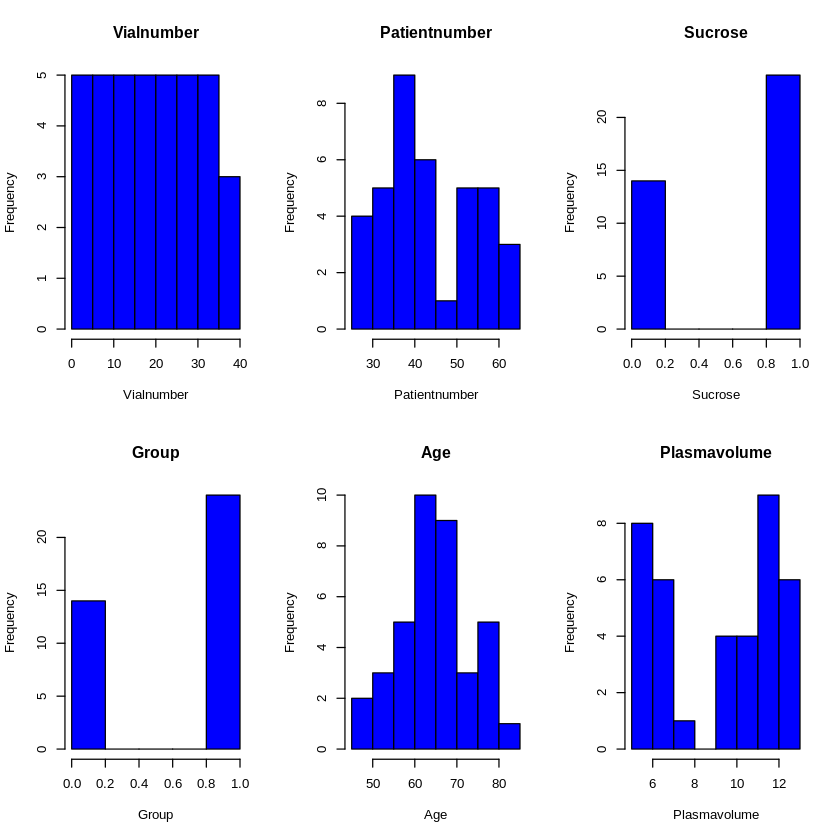

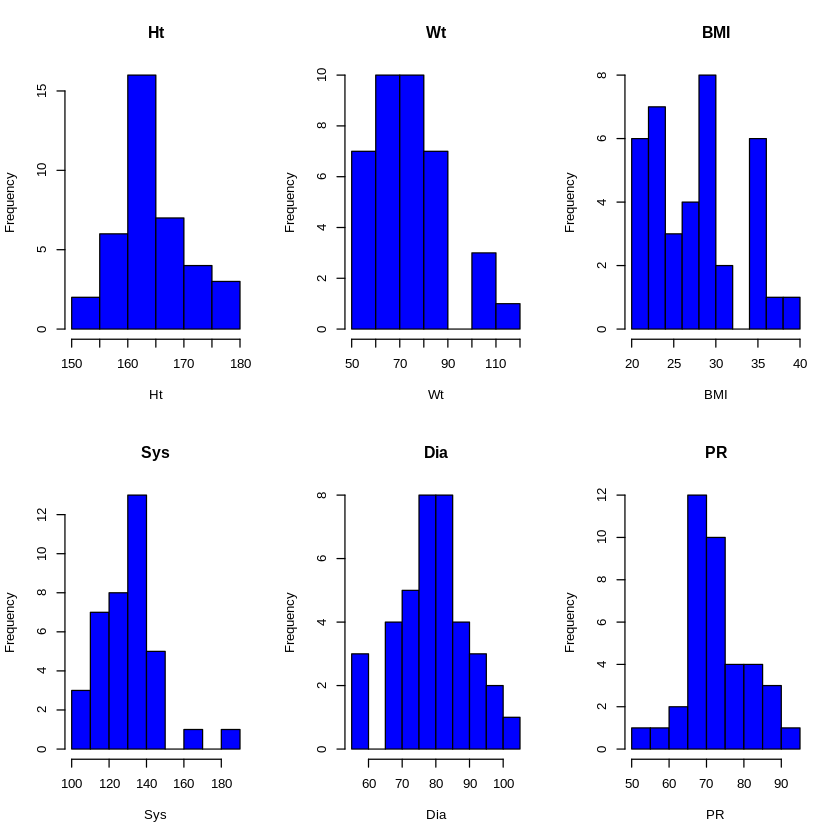

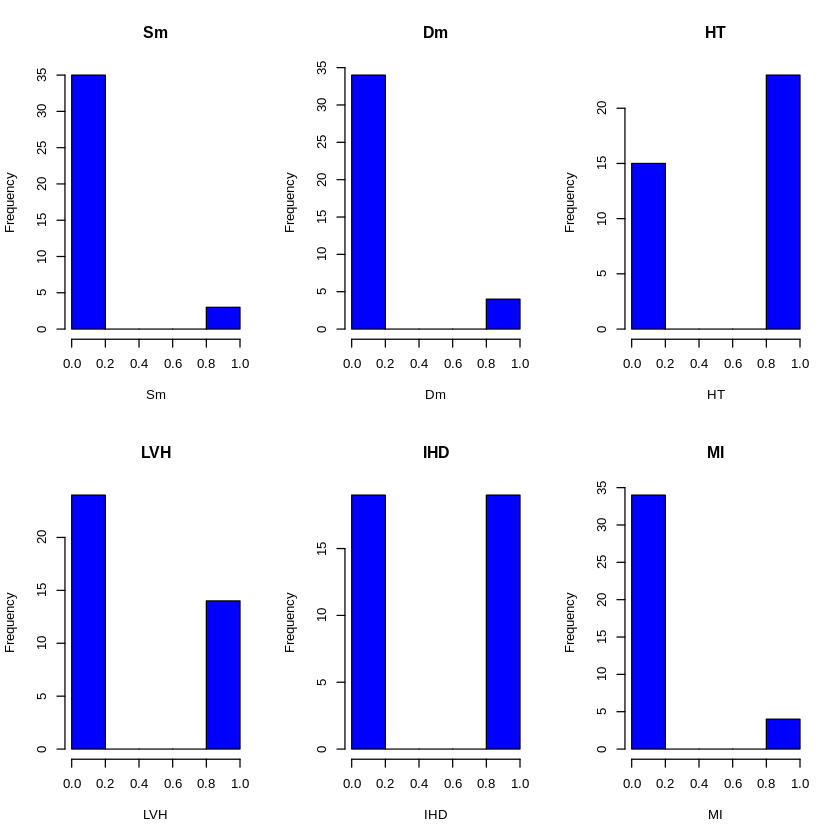

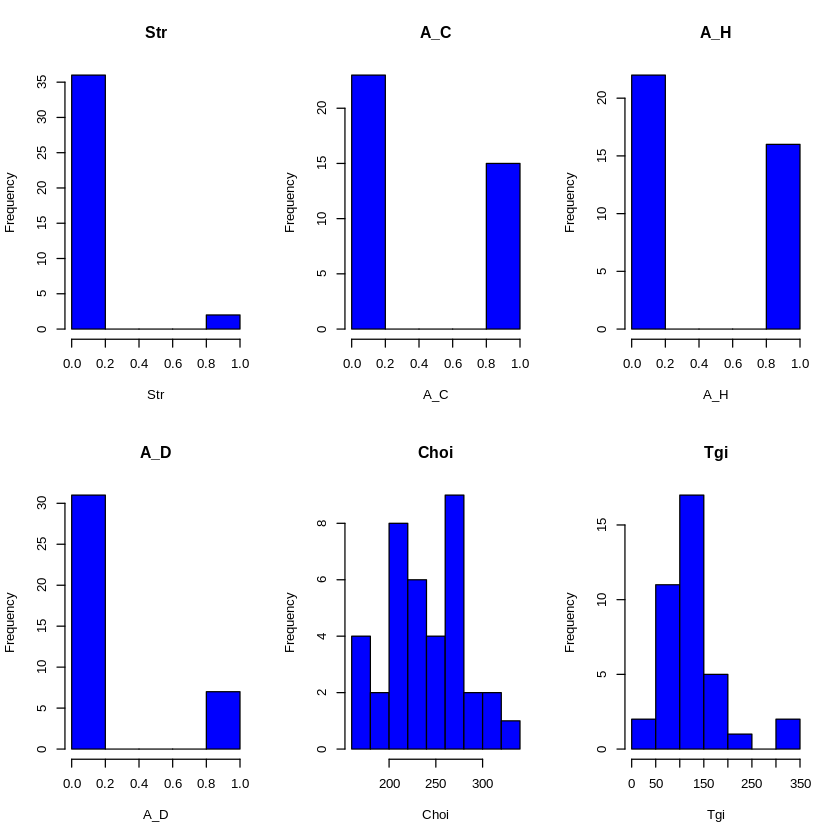

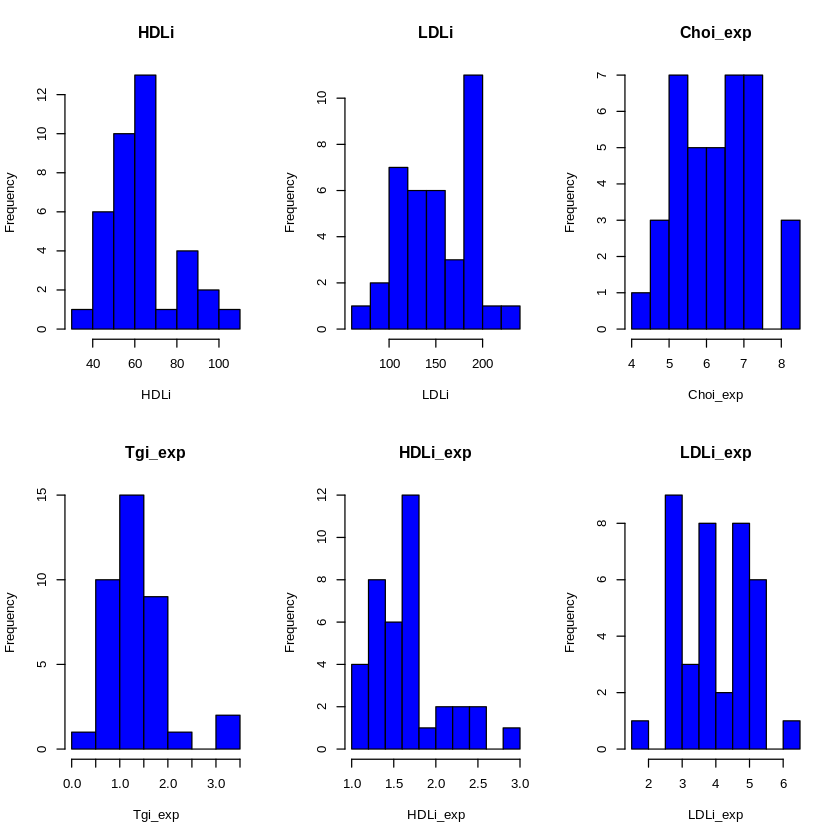

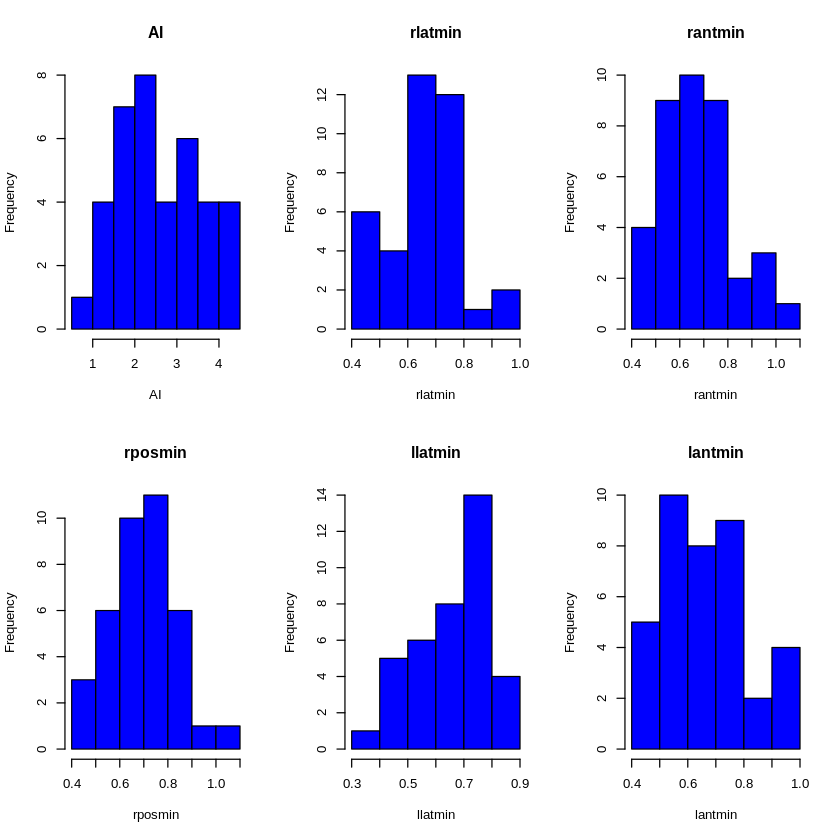

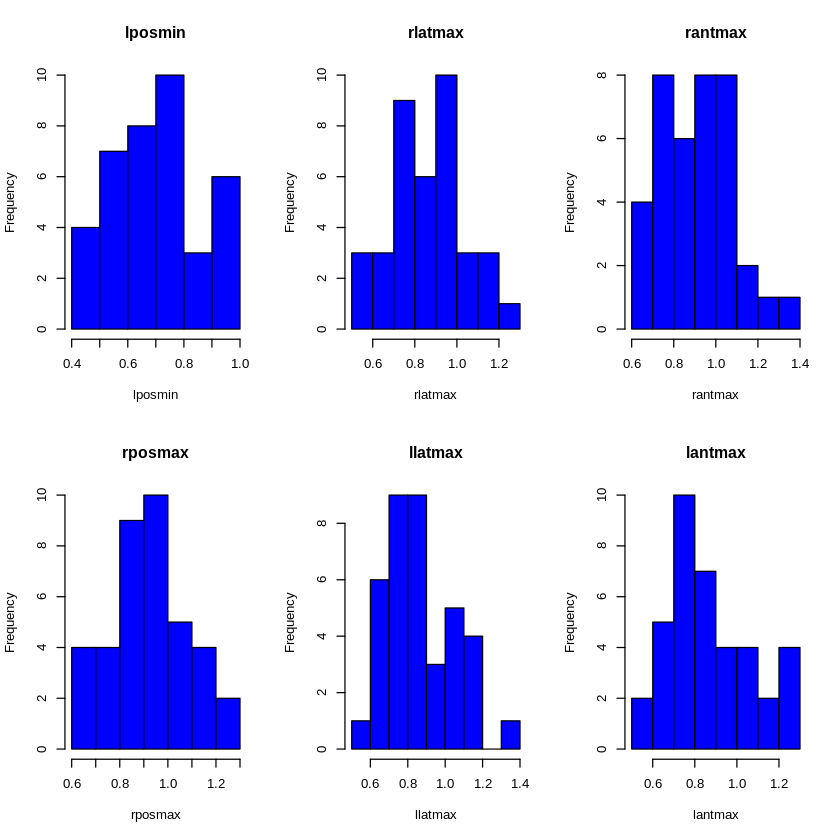

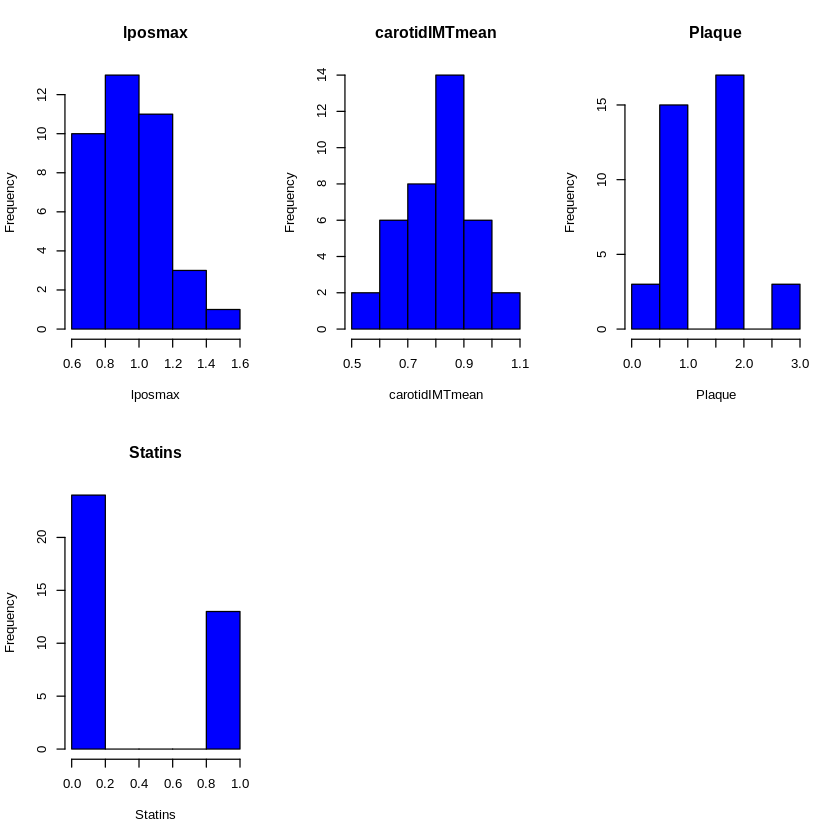

In [61]:
par(mfrow=c(2, 3))  # Adjust layout to fit multiple histograms

for (i in 1:ncol(numeric_columns)) {
    hist(numeric_columns[, i], main=names(numeric_columns)[i], xlab=names(numeric_columns)[i], col='blue')
}

par(mfrow=c(1, 1))  # Reset layout

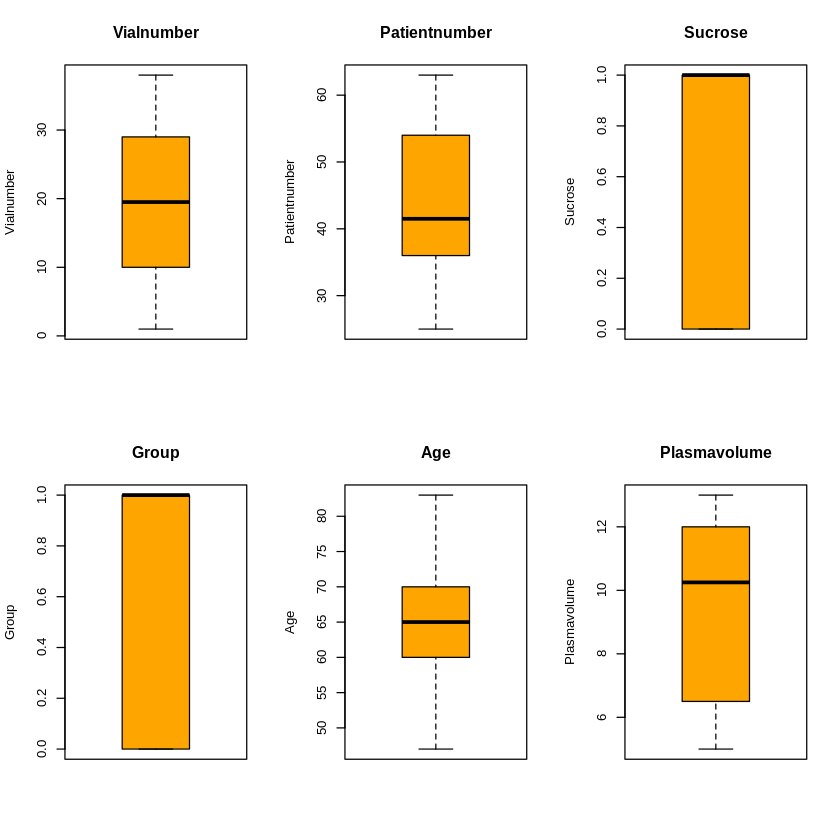

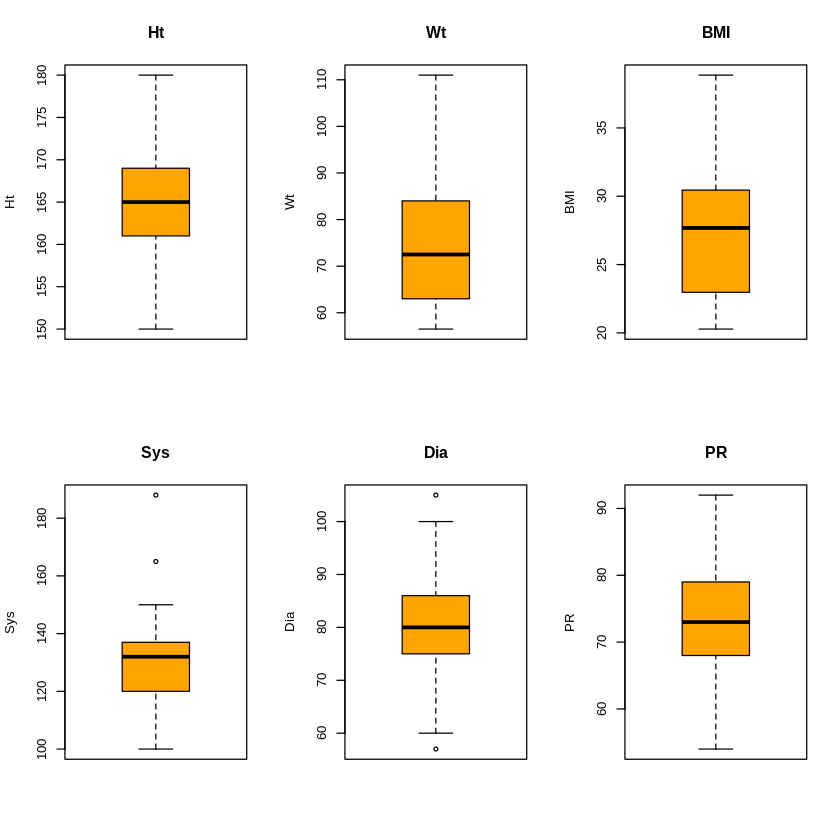

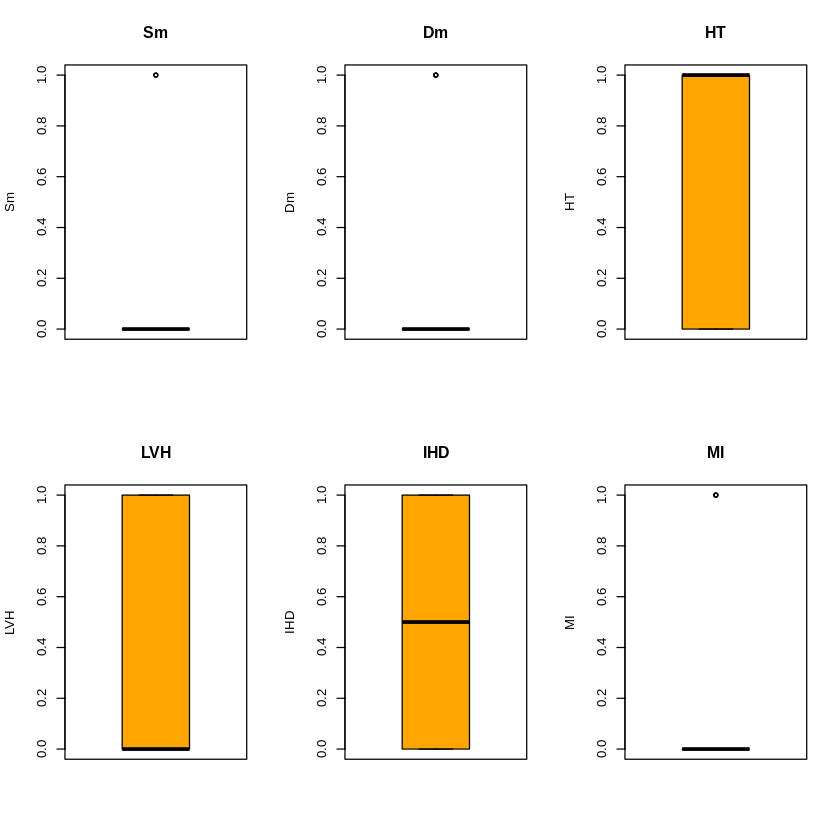

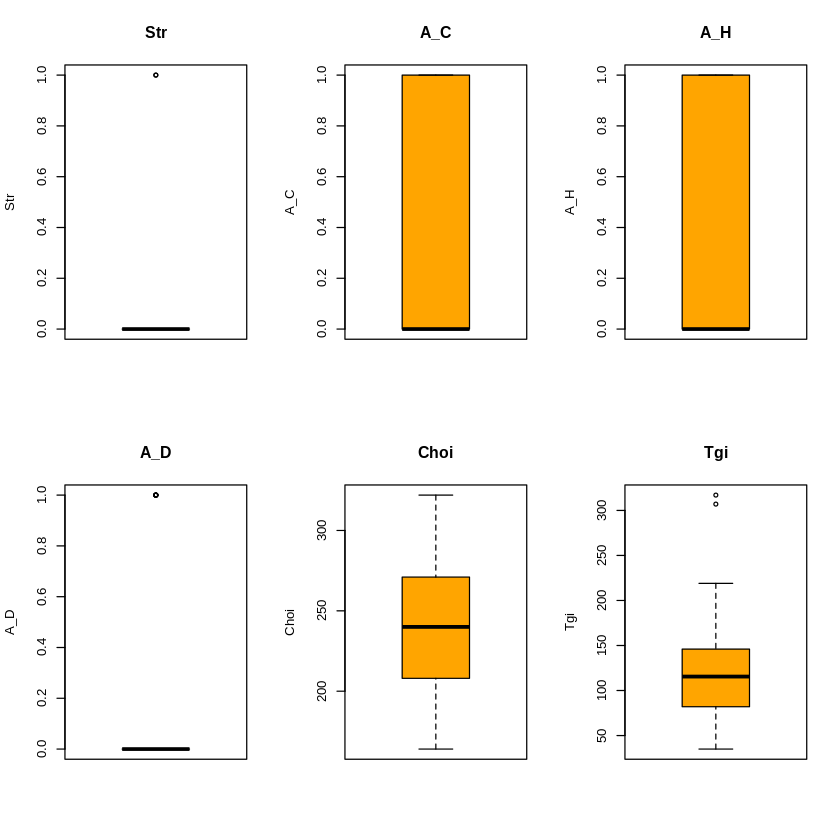

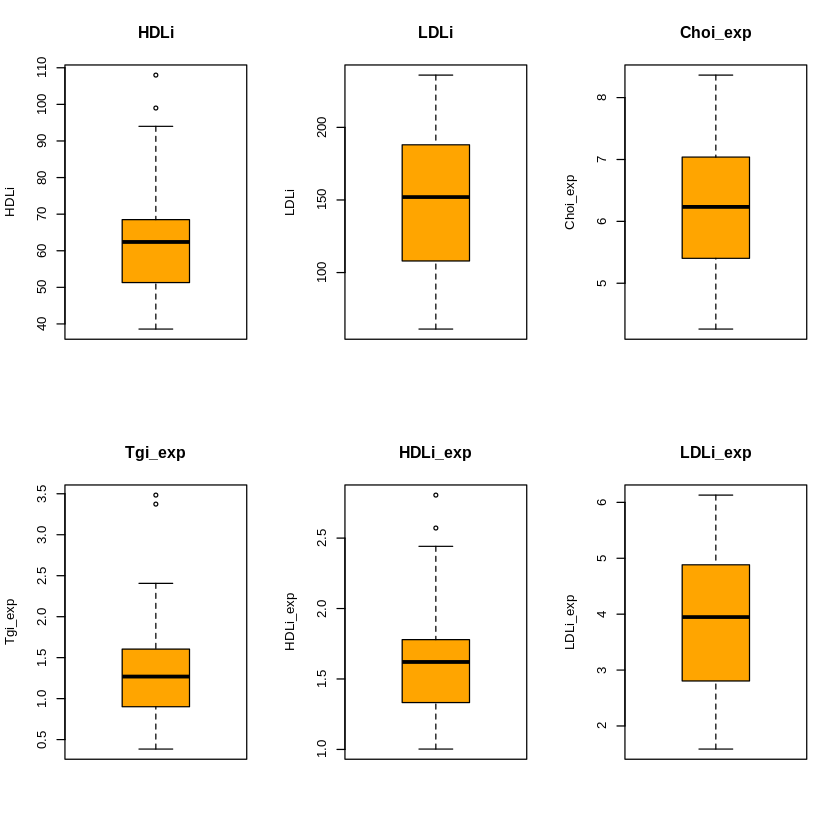

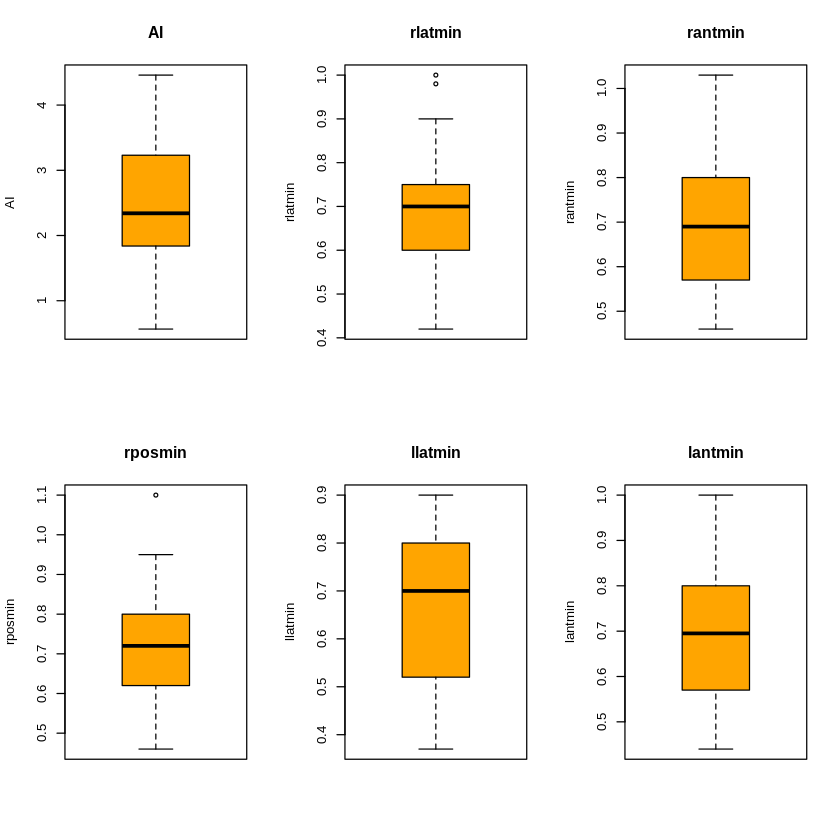

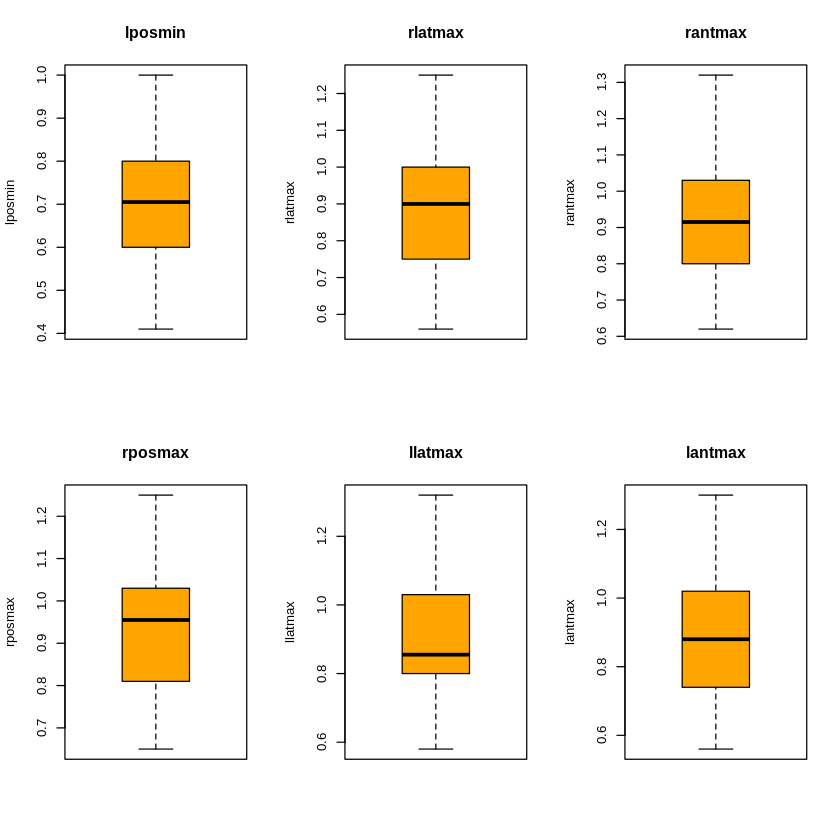

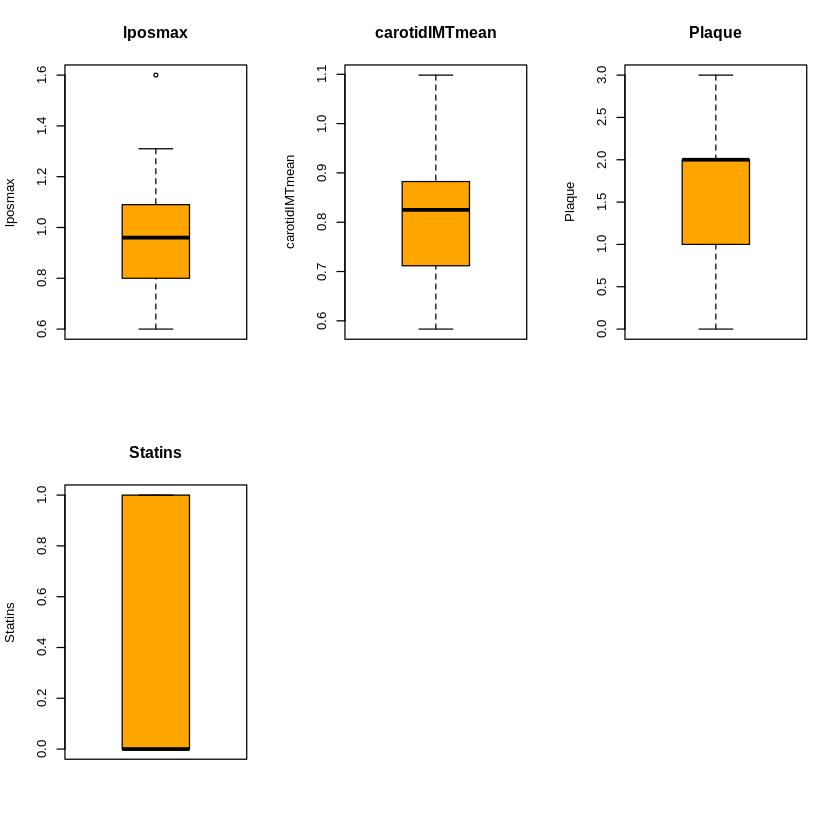

In [62]:
par(mfrow=c(2, 3))  # Adjust layout to fit multiple boxplots

for (i in 1:ncol(numeric_columns)) {
    boxplot(numeric_columns[, i], main=names(numeric_columns)[i], ylab=names(numeric_columns)[i], col='orange')
}

par(mfrow=c(1, 1))  # Reset layout

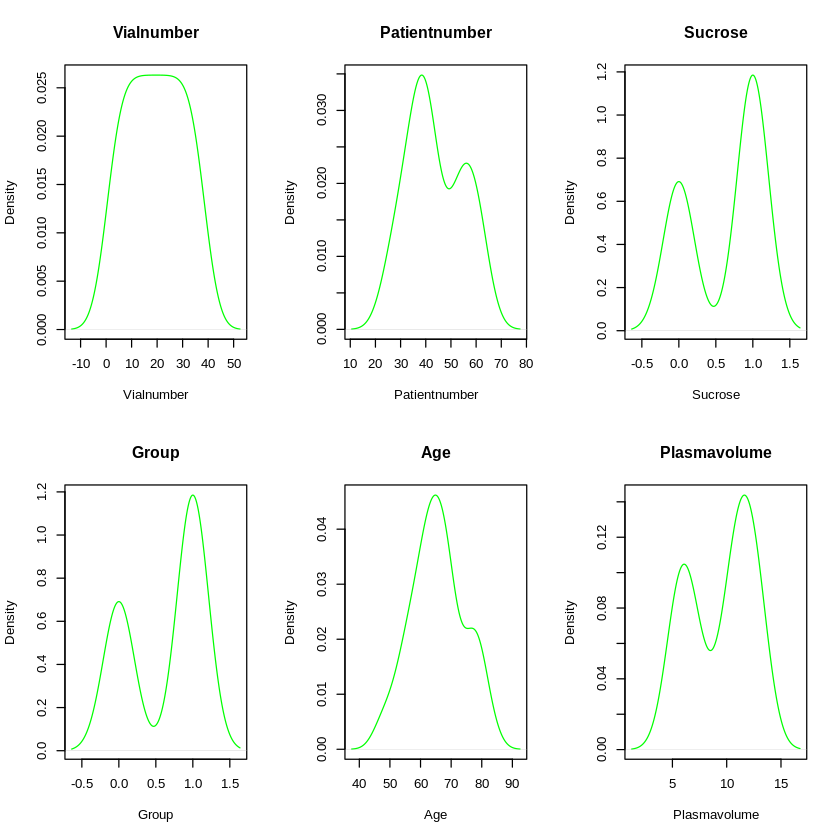

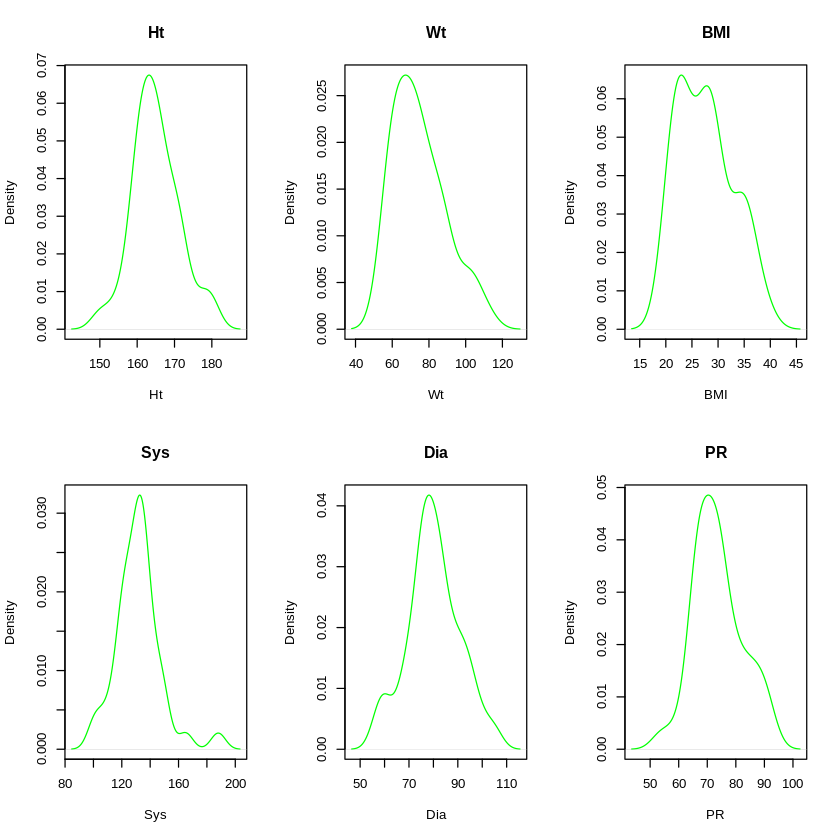

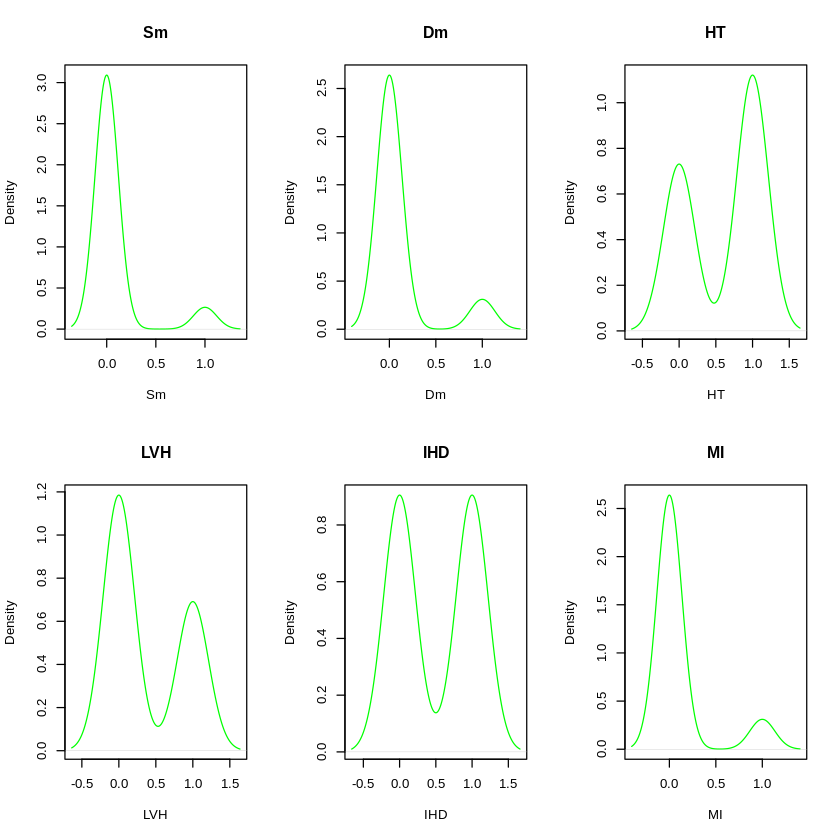

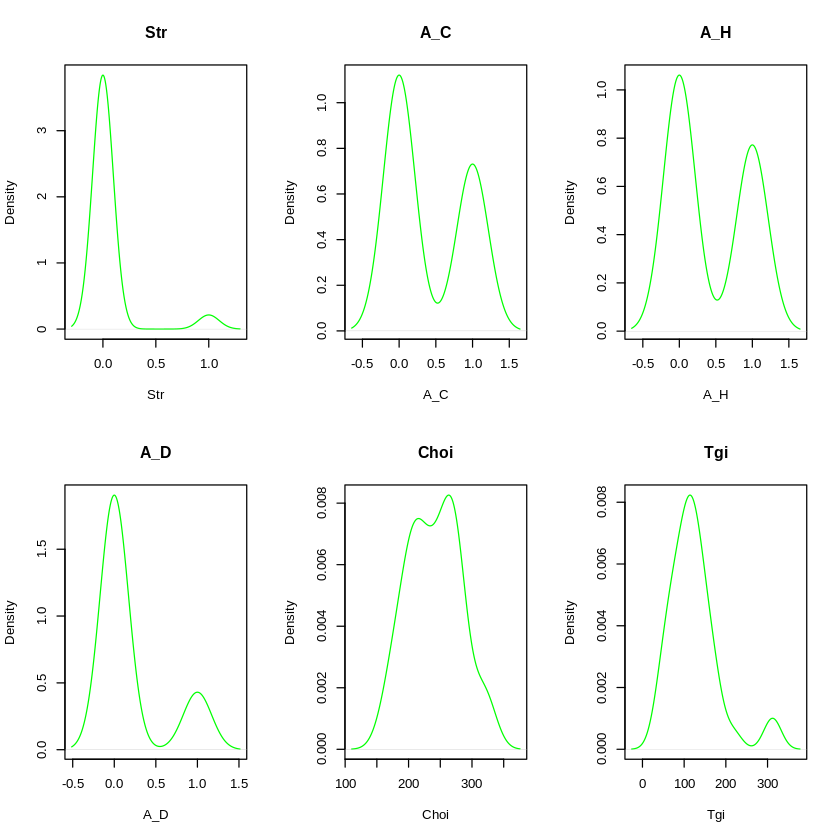

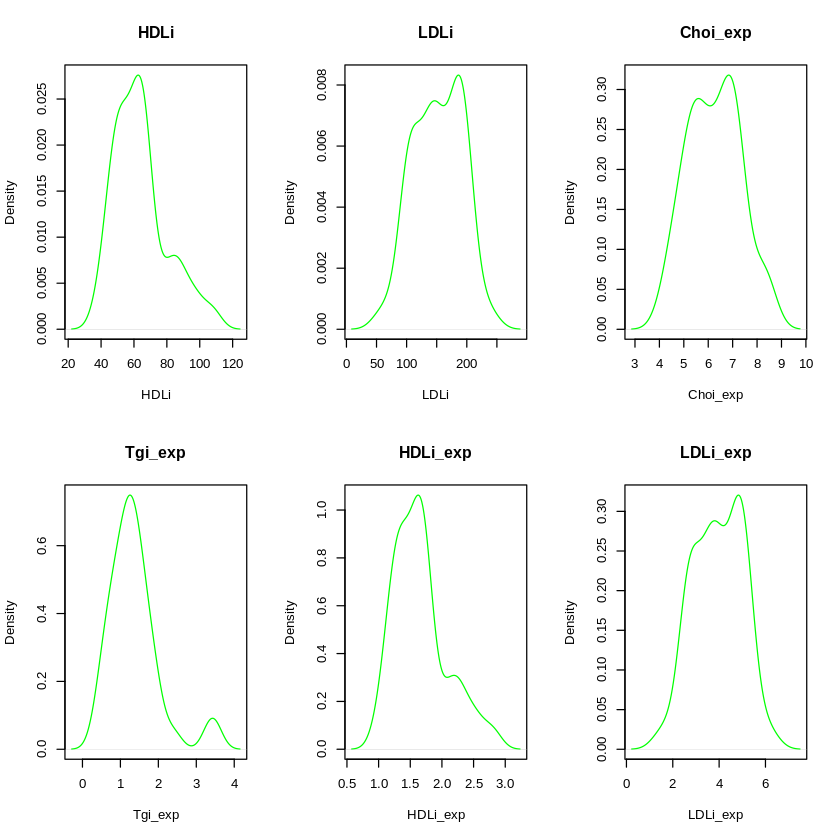

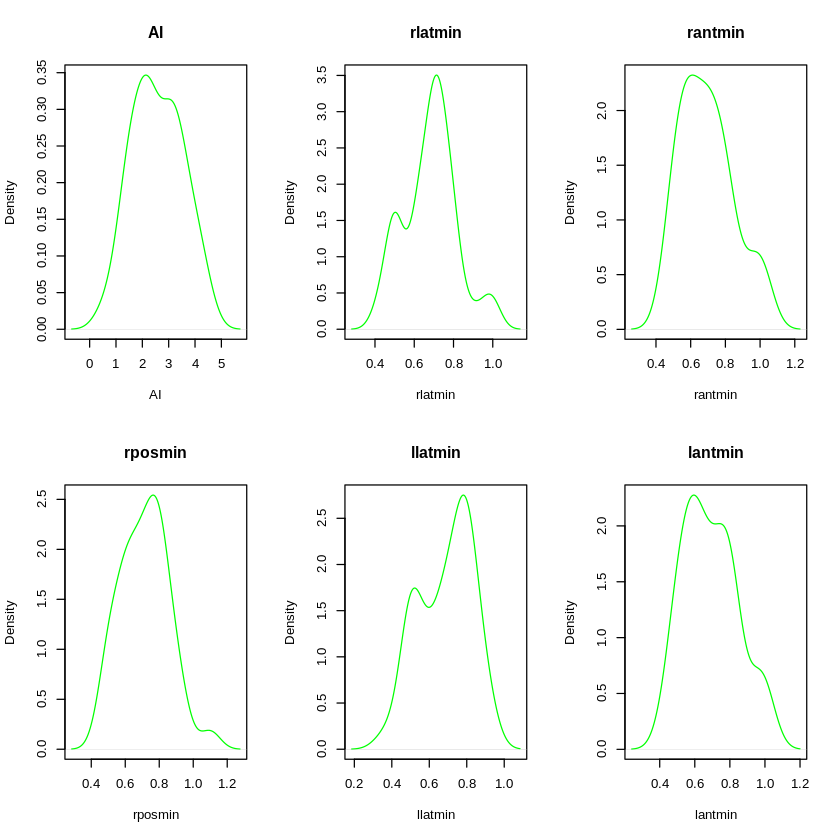

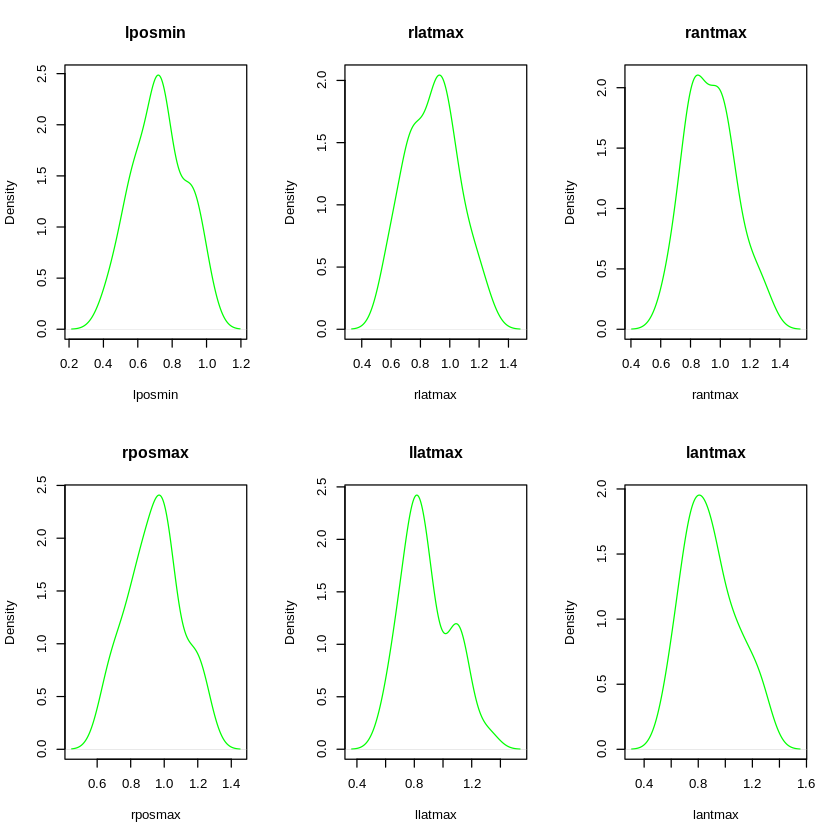

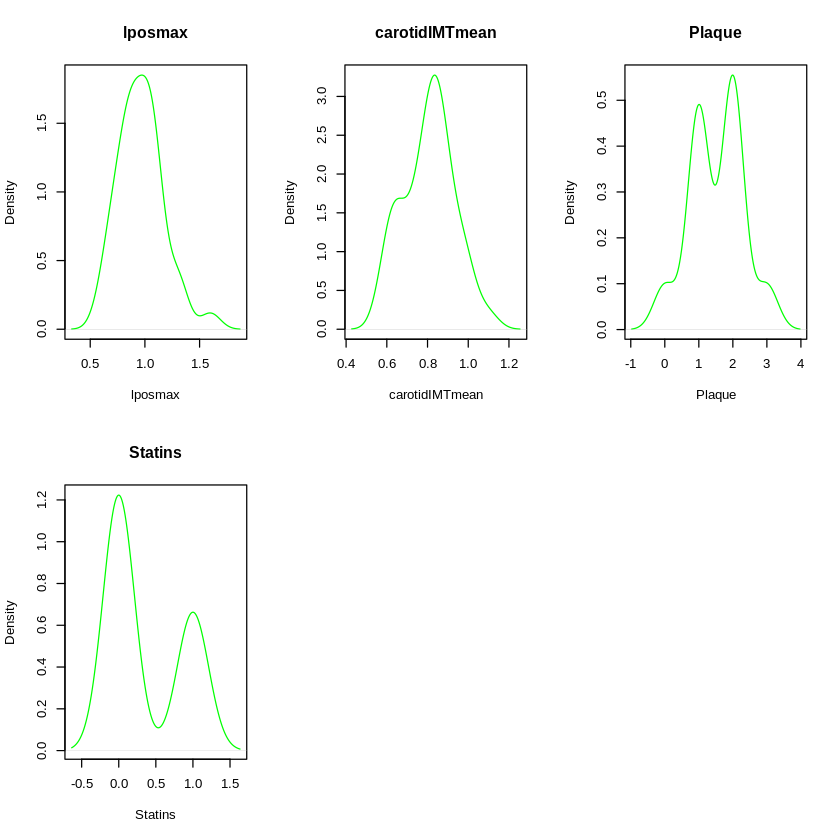

In [63]:
par(mfrow=c(2, 3))  # Adjust layout to fit multiple density plots

for (i in 1:ncol(numeric_columns)) {
    plot(density(numeric_columns[, i], na.rm = TRUE), main=names(numeric_columns)[i], xlab=names(numeric_columns)[i], col='green')
}

par(mfrow=c(1, 1))  # Reset layout

### data_lipids_high

In [42]:
numeric_columns <- data_lipids_high[, sapply(data_lipids_high, is.numeric)]

In [43]:
summary(numeric_columns)

  Vial.number    Patient.number      GPHDL1           GPHDL2     
 Min.   : 1.00   Min.   :25.00   Min.   :0.3000   Min.   :1.300  
 1st Qu.: 8.50   1st Qu.:38.00   1st Qu.:0.4100   1st Qu.:1.970  
 Median :15.00   Median :43.00   Median :0.4500   Median :2.380  
 Mean   :16.81   Mean   :46.52   Mean   :0.4604   Mean   :2.432  
 3rd Qu.:25.00   3rd Qu.:56.50   3rd Qu.:0.5100   3rd Qu.:2.900  
 Max.   :36.00   Max.   :63.00   Max.   :0.7233   Max.   :3.860  
     GPHDL3           GPHDL4            GPHDL5           GPHDL6     
 Min.   :0.1400   Min.   :0.03000   Min.   :0.5900   Min.   :2.270  
 1st Qu.:0.2050   1st Qu.:0.05000   1st Qu.:0.7500   1st Qu.:2.752  
 Median :0.2300   Median :0.06000   Median :0.8400   Median :2.900  
 Mean   :0.2407   Mean   :0.07006   Mean   :0.8518   Mean   :2.860  
 3rd Qu.:0.2950   3rd Qu.:0.08000   3rd Qu.:0.9700   3rd Qu.:3.005  
 Max.   :0.4600   Max.   :0.17000   Max.   :1.1833   Max.   :3.190  
     GPHDL7          GPHDL8          GPHDL9         GPH

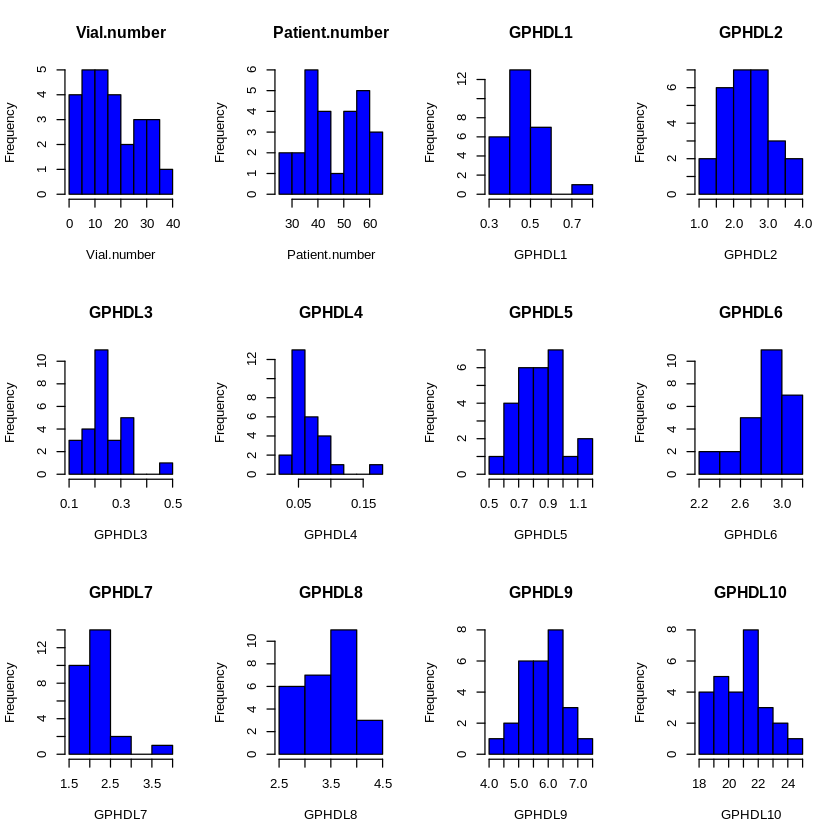

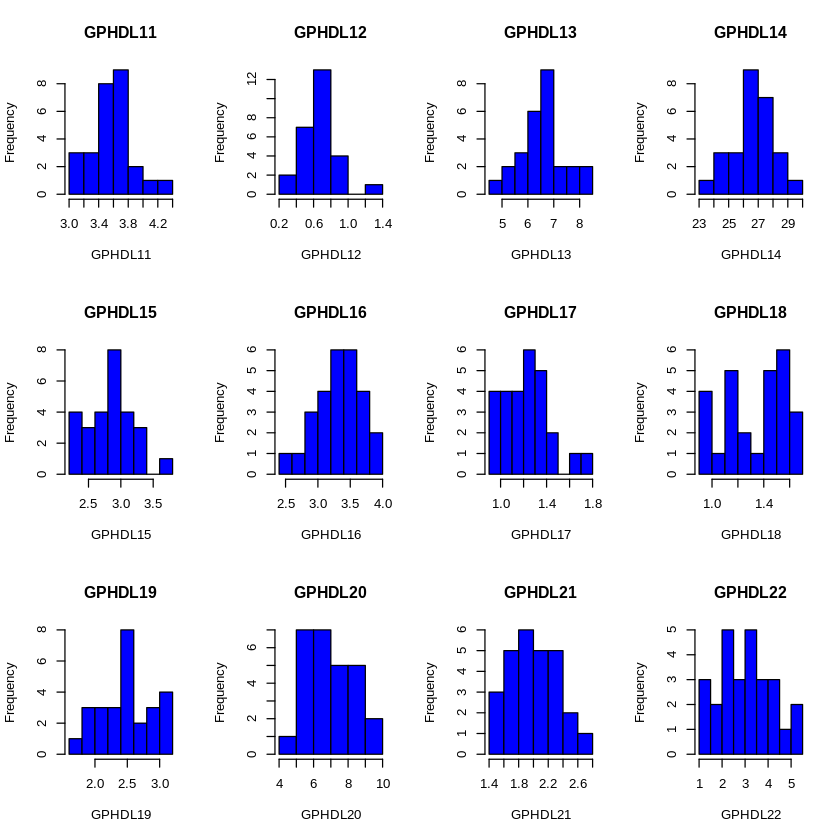

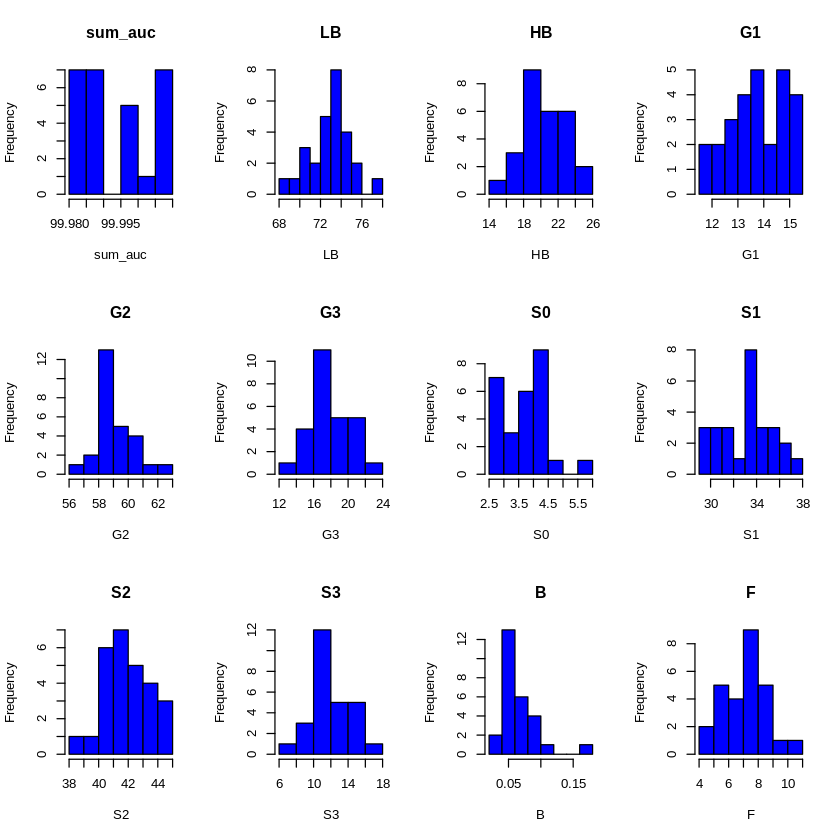

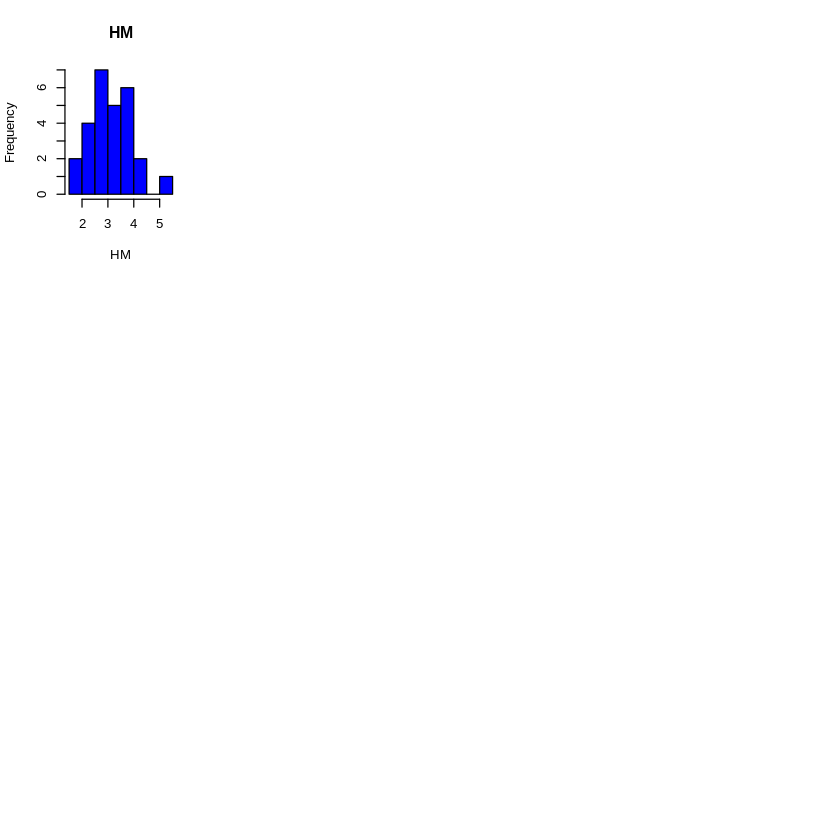

In [55]:
par(mfrow=c(3, 4))  # Adjust layout to fit multiple histograms

for (i in 1:ncol(numeric_columns)) {
    hist(numeric_columns[, i], main=names(numeric_columns)[i], xlab=names(numeric_columns)[i], col='blue')
}

# par(mfrow=c(1, 1))  # Reset layout

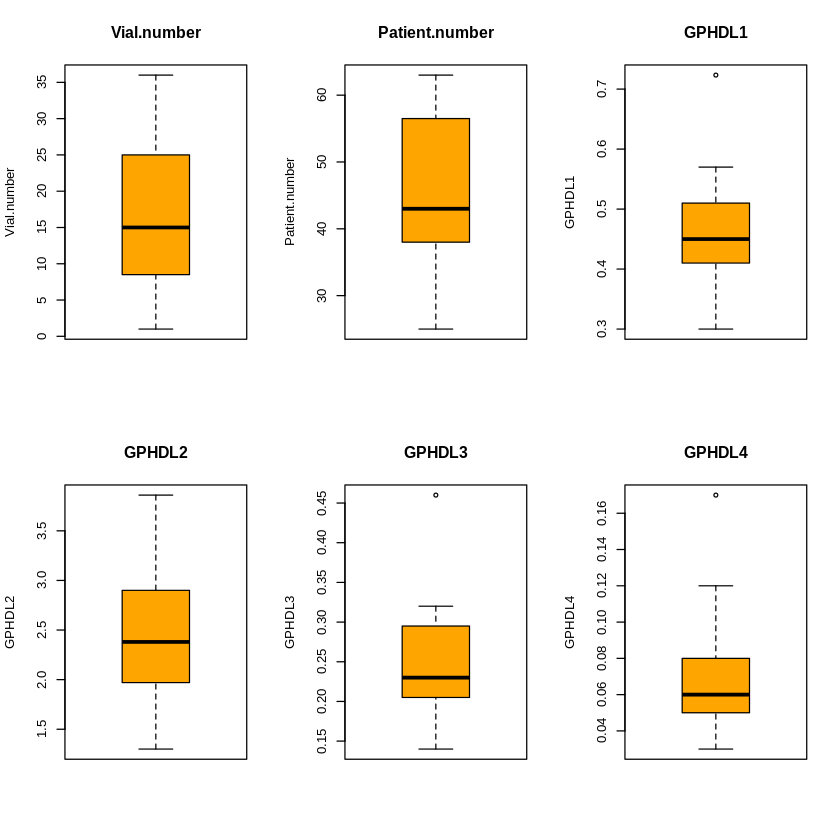

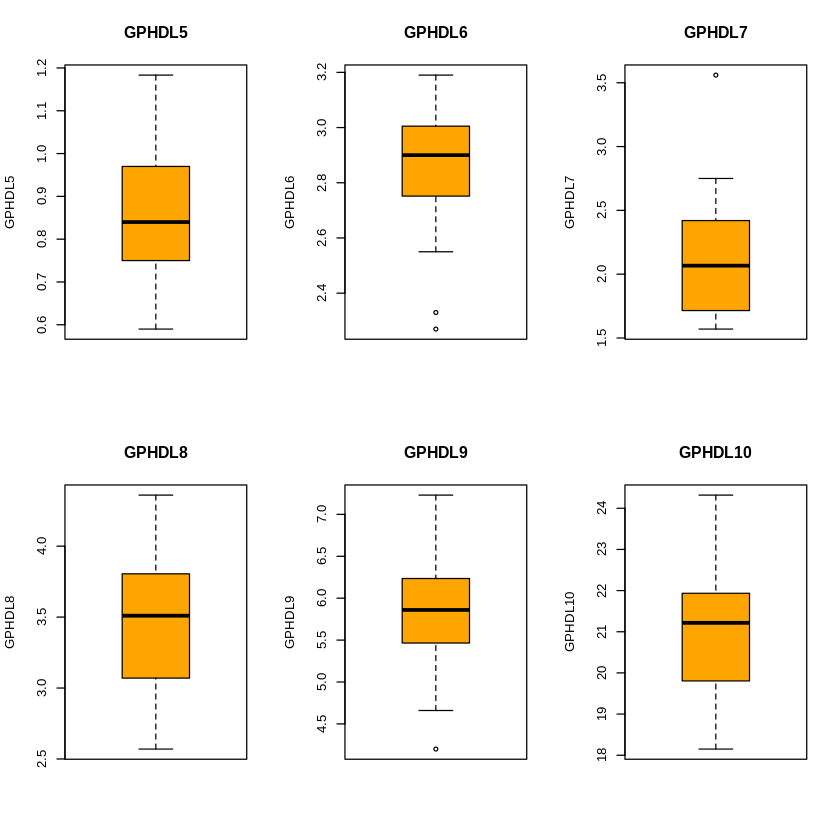

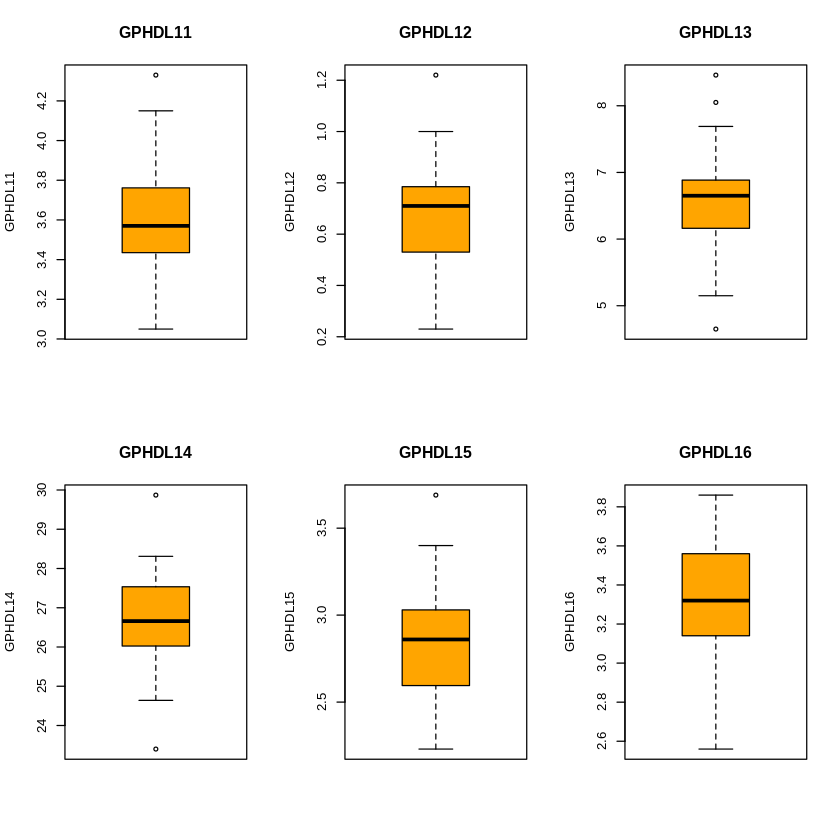

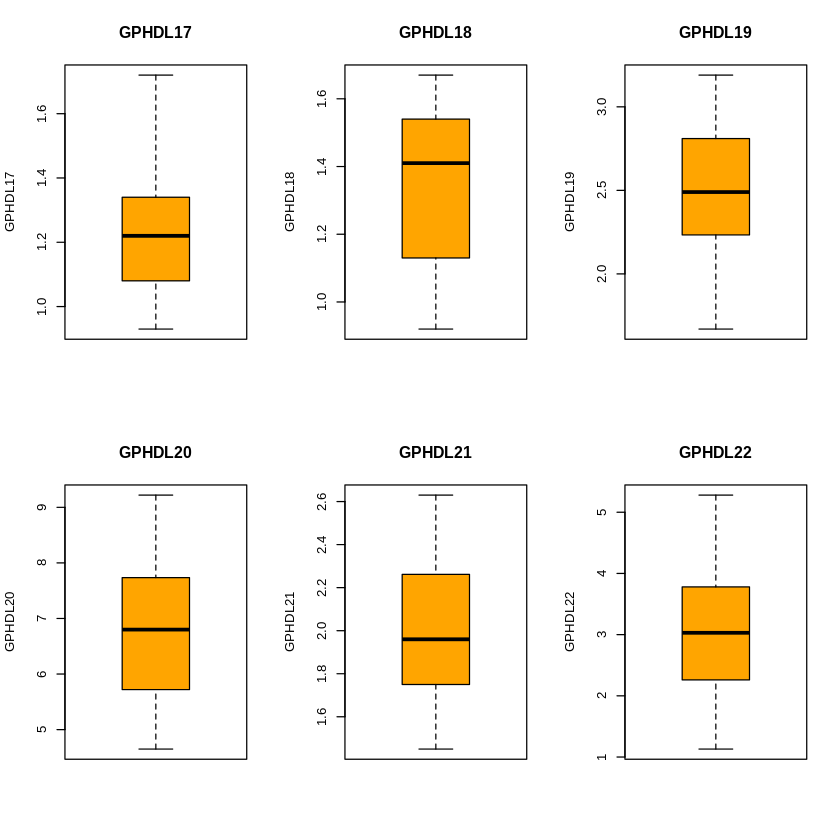

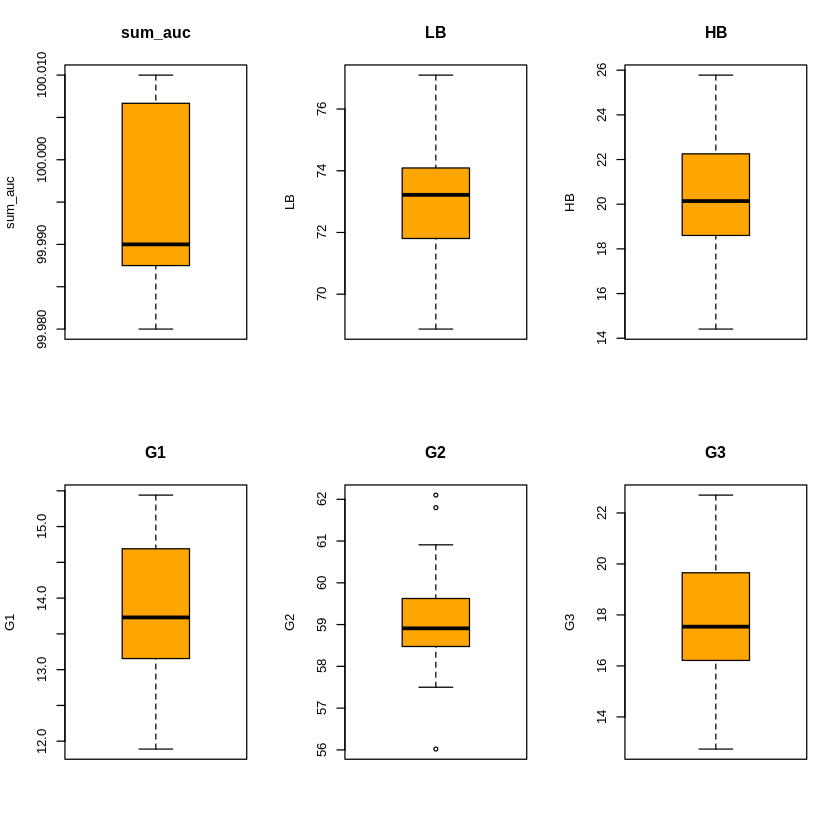

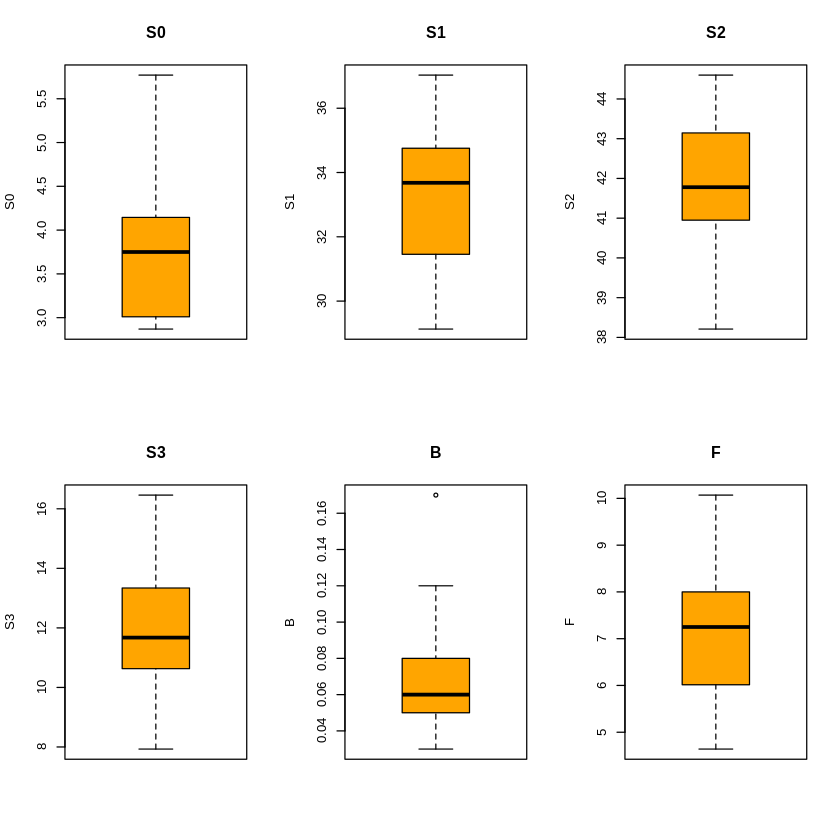

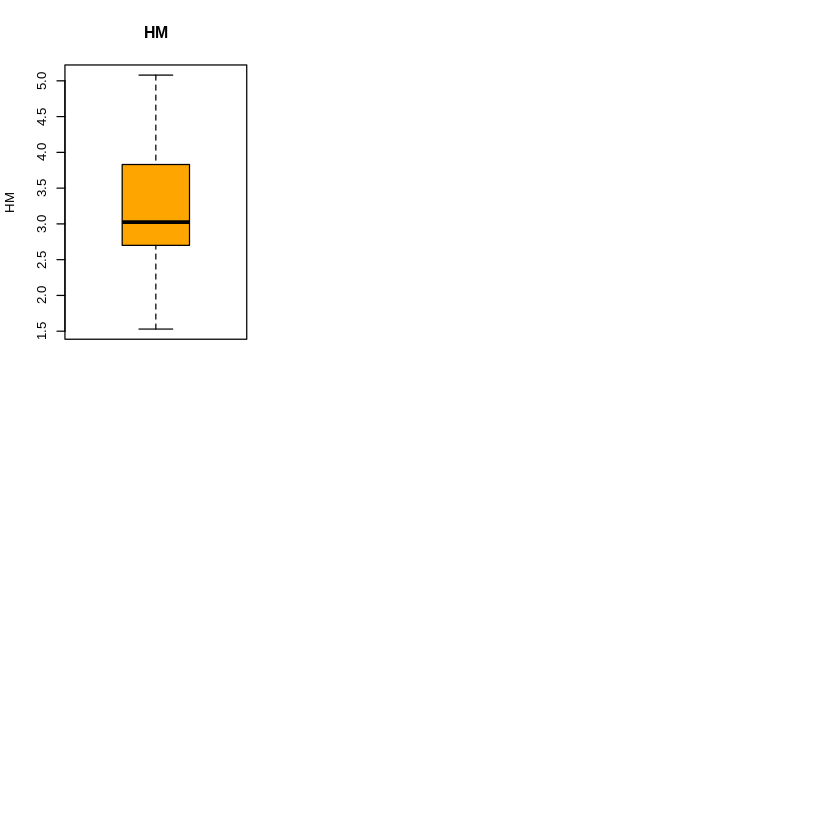

In [57]:
par(mfrow=c(2, 3))  # Adjust layout to fit multiple boxplots

for (i in 1:ncol(numeric_columns)) {
    boxplot(numeric_columns[, i], main=names(numeric_columns)[i], ylab=names(numeric_columns)[i], col='orange')
}

# par(mfrow=c(1, 1))  # Reset layout

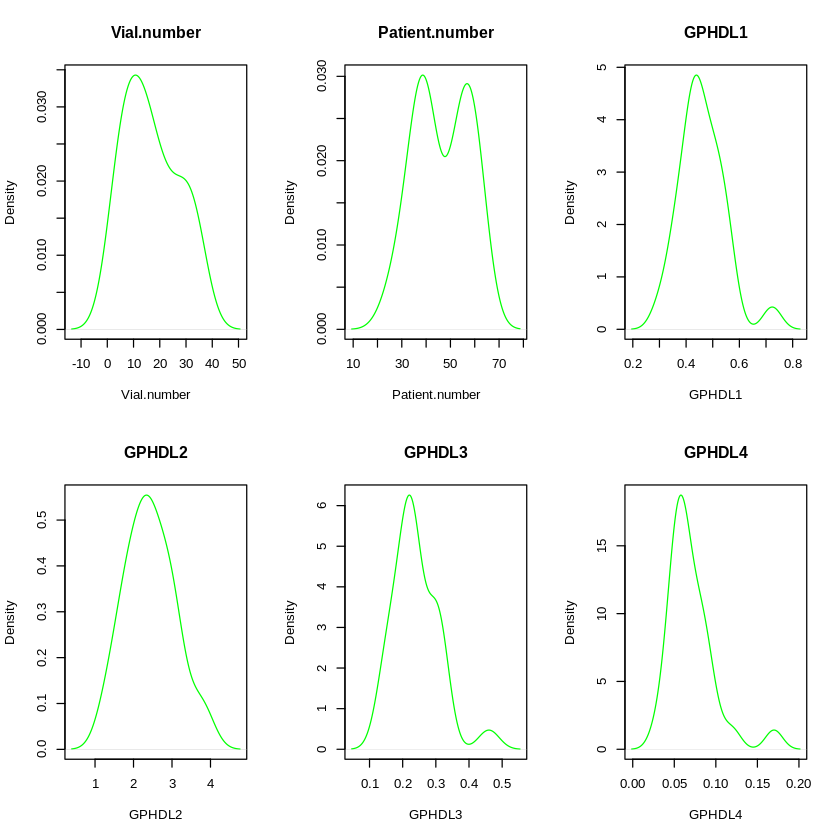

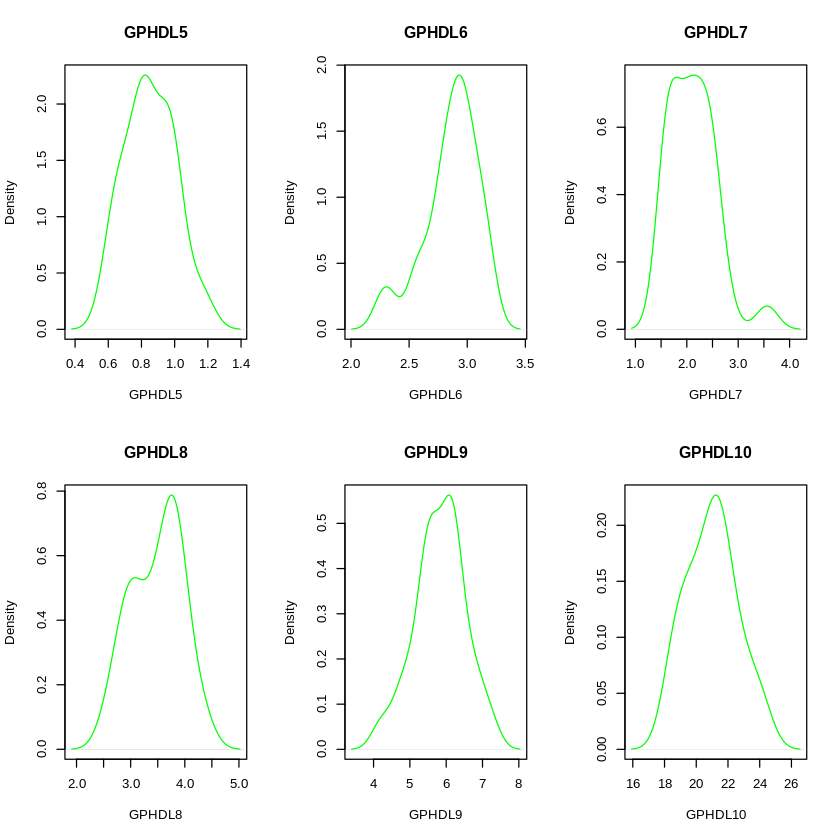

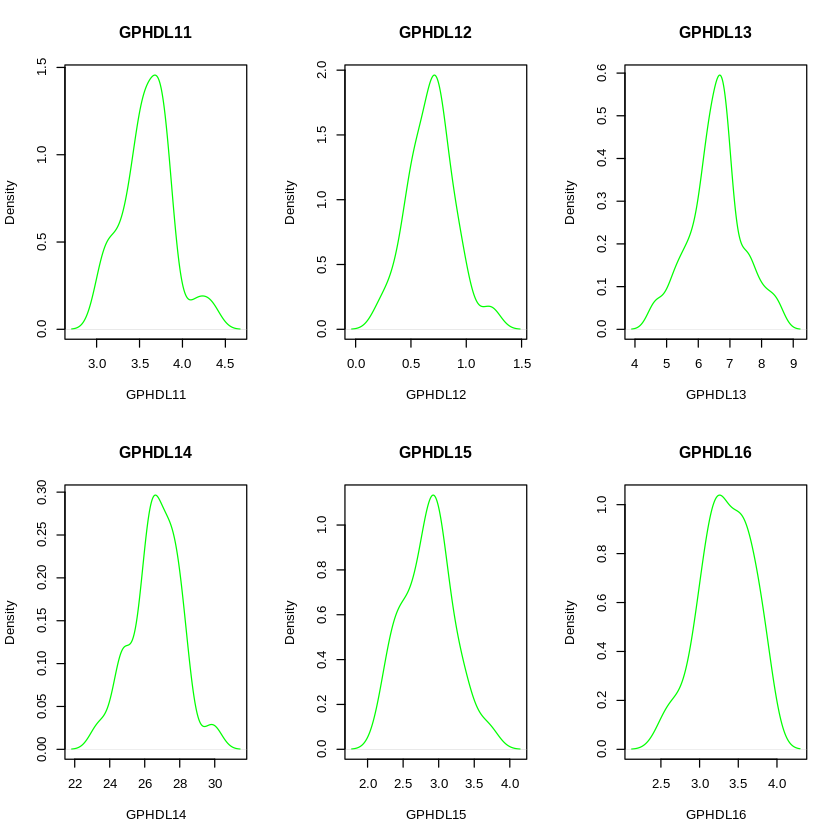

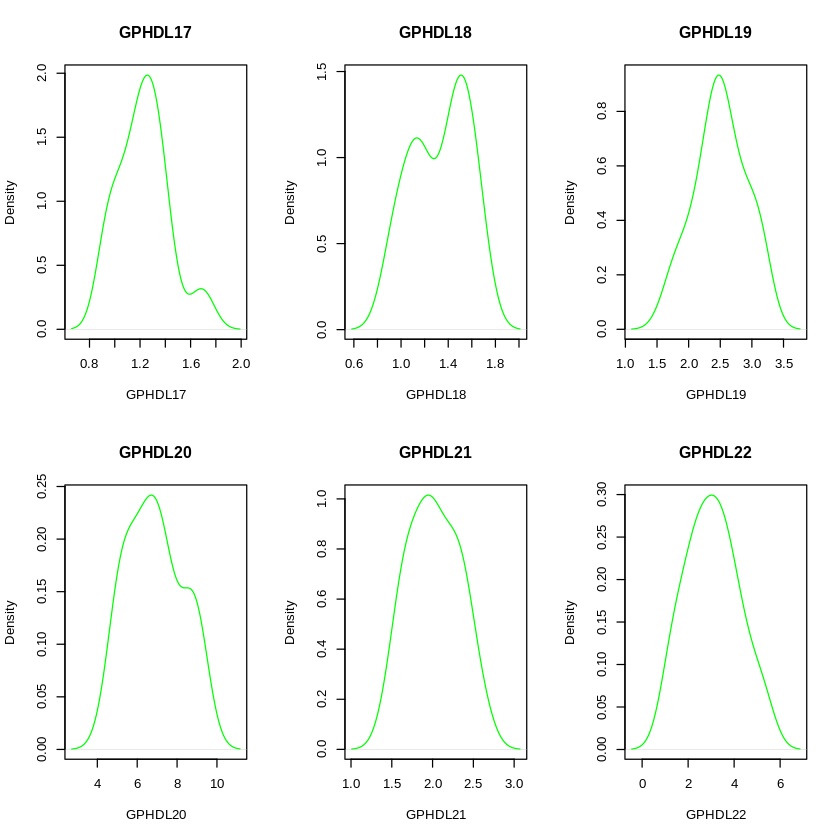

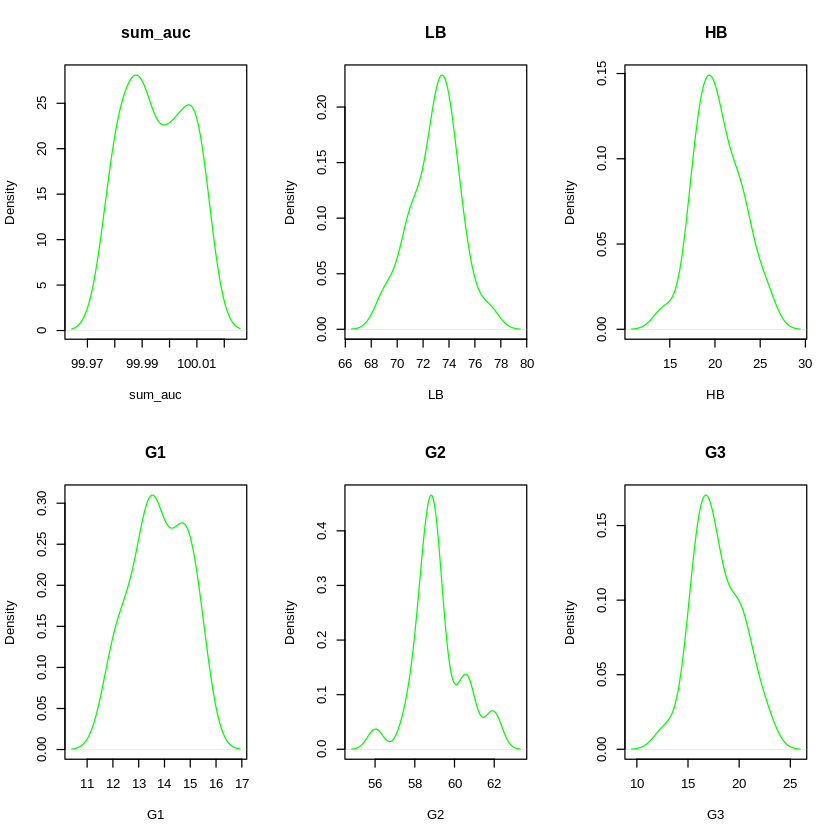

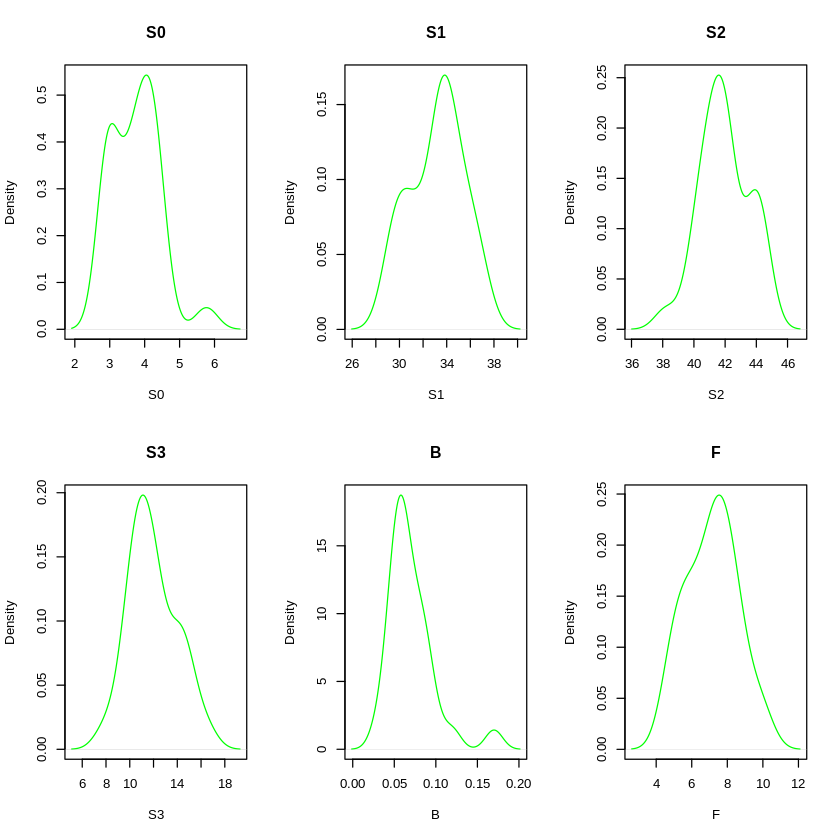

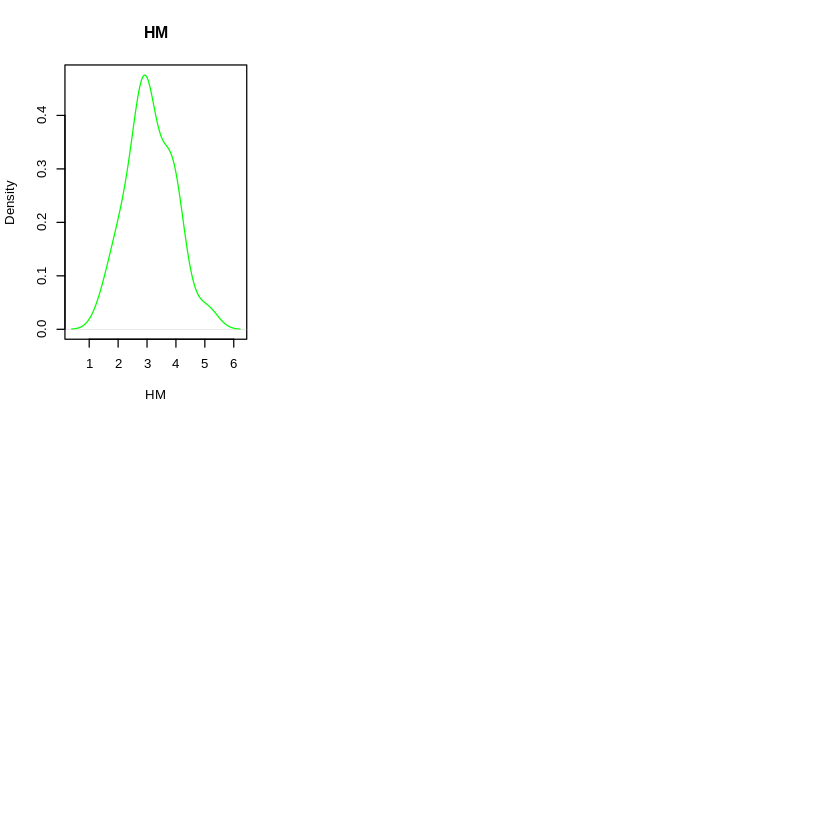

In [58]:
par(mfrow=c(2, 3))  # Adjust layout to fit multiple density plots

for (i in 1:ncol(numeric_columns)) {
    plot(density(numeric_columns[, i], na.rm = TRUE), main=names(numeric_columns)[i], xlab=names(numeric_columns)[i], col='green')
}

par(mfrow=c(1, 1))  # Reset layout

### data_lipids_low

In [64]:
numeric_columns <- data_lipids_low[, sapply(data_lipids_low, is.numeric)]

In [65]:
summary(numeric_columns)

  Vial.number Patient.number      GPLDL1           GPLDL2          GPLDL3      
 Min.   : 1   Min.   :25.00   Min.   :0.2400   Min.   :6.500   Min.   :0.1400  
 1st Qu.: 9   1st Qu.:38.00   1st Qu.:0.3200   1st Qu.:7.370   1st Qu.:0.2200  
 Median :16   Median :43.00   Median :0.3900   Median :7.930   Median :0.2500  
 Mean   :17   Mean   :46.17   Mean   :0.3819   Mean   :7.858   Mean   :0.2583  
 3rd Qu.:24   3rd Qu.:56.00   3rd Qu.:0.4400   3rd Qu.:8.260   3rd Qu.:0.3100  
 Max.   :36   Max.   :63.00   Max.   :0.5200   Max.   :9.680   Max.   :0.3900  
     GPLDL4            GPLDL5          GPLDL6          GPLDL7     
 Min.   :0.02000   Min.   :0.870   Min.   :3.470   Min.   :1.990  
 1st Qu.:0.02000   1st Qu.:0.970   1st Qu.:3.830   1st Qu.:2.320  
 Median :0.02000   Median :1.070   Median :4.100   Median :2.610  
 Mean   :0.02845   Mean   :1.055   Mean   :4.117   Mean   :2.542  
 3rd Qu.:0.03000   3rd Qu.:1.120   3rd Qu.:4.380   3rd Qu.:2.690  
 Max.   :0.06000   Max.   :1.250   Max

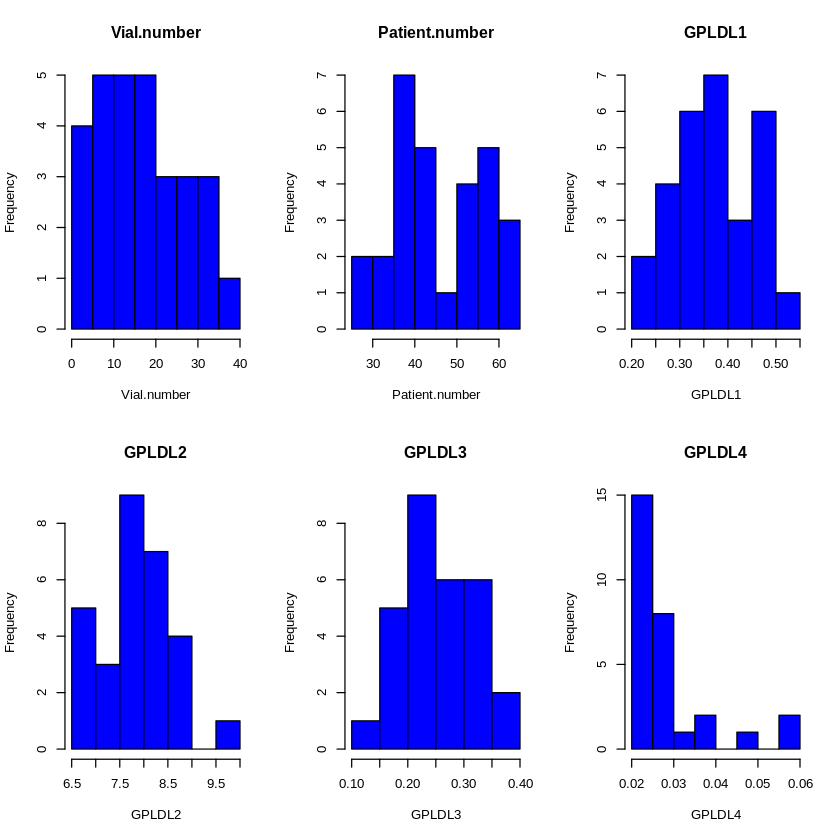

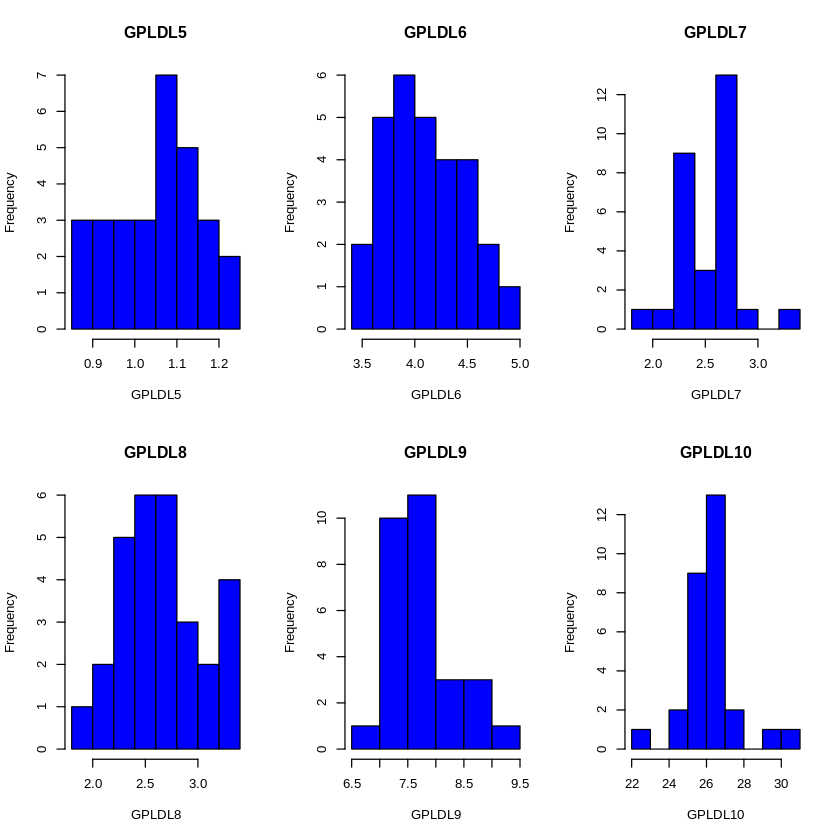

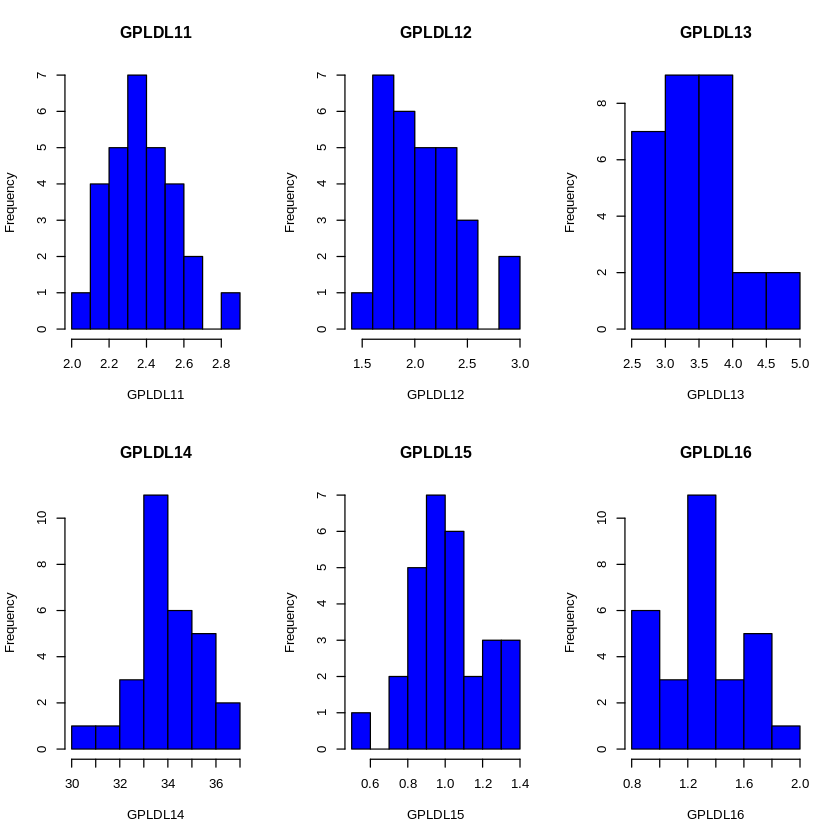

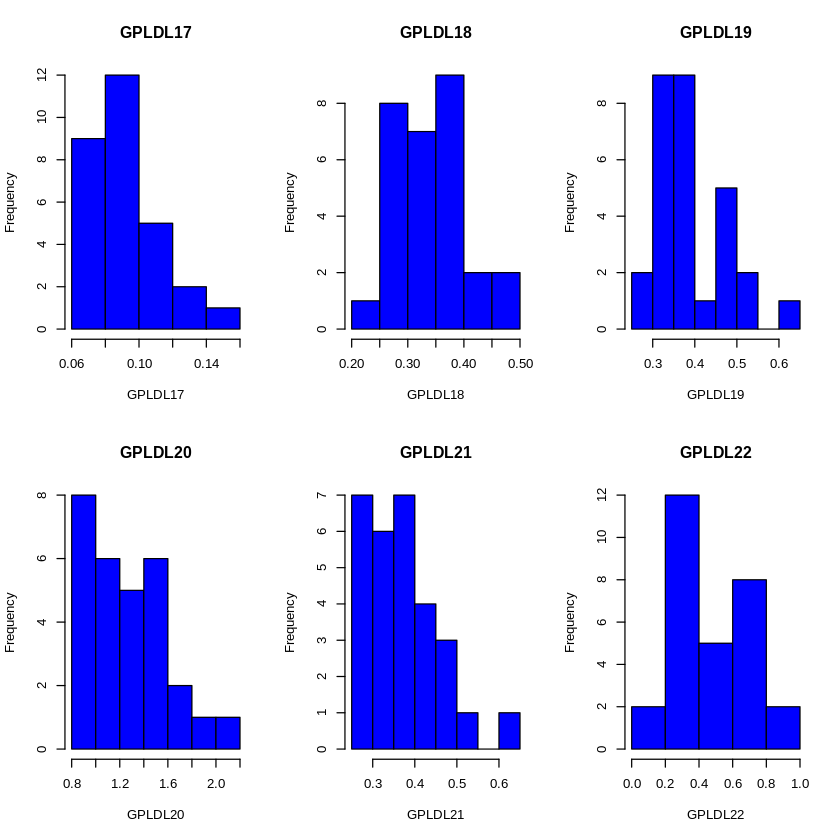

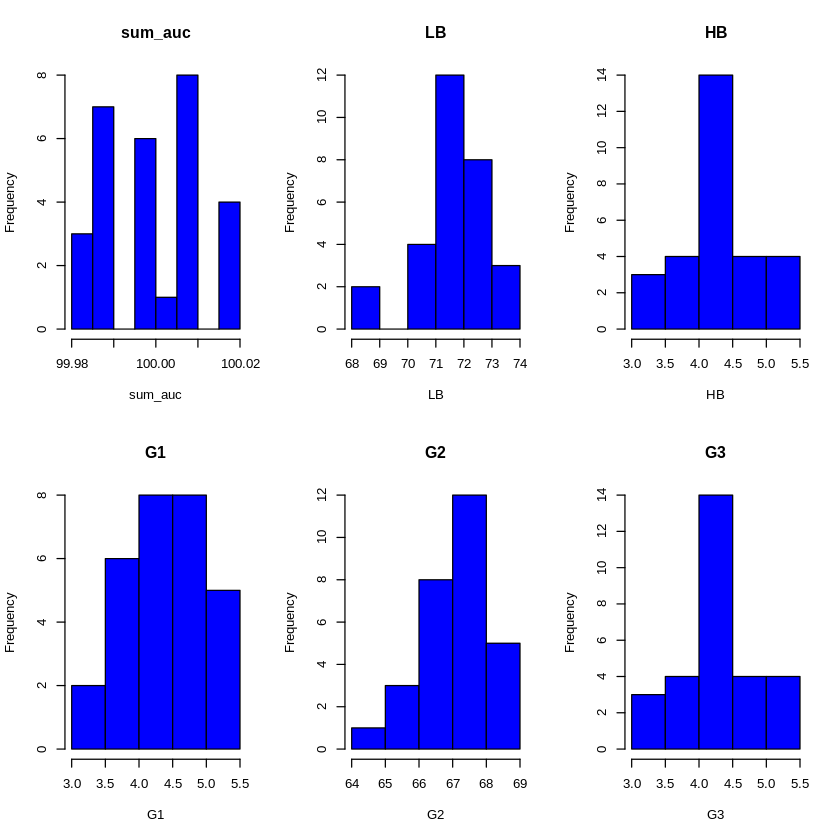

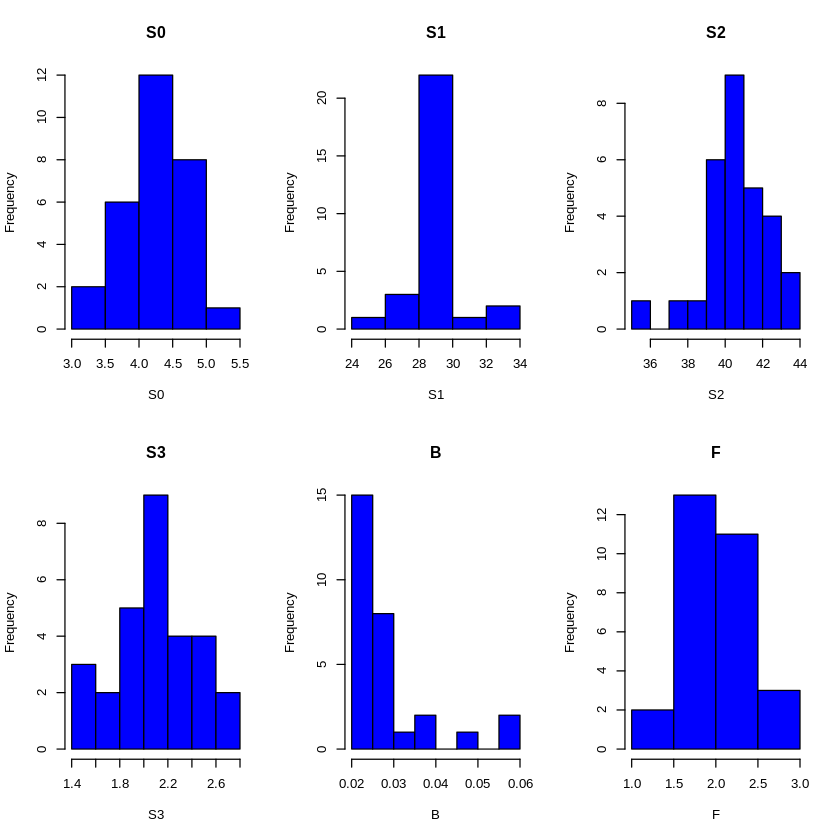

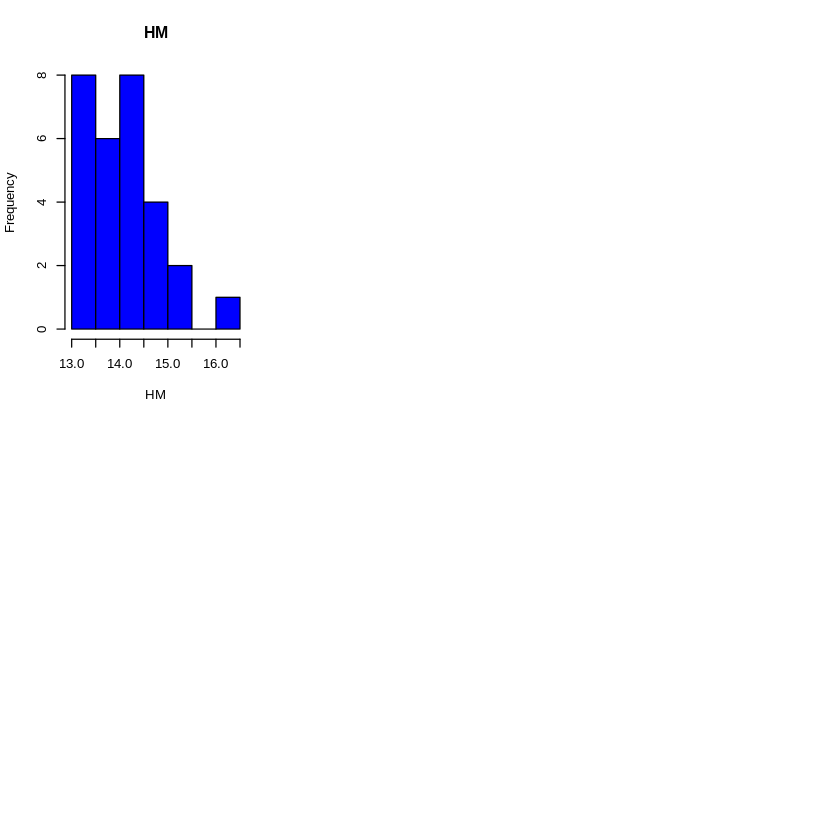

In [66]:
par(mfrow=c(2, 3))  # Adjust layout to fit multiple histograms

for (i in 1:ncol(numeric_columns)) {
    hist(numeric_columns[, i], main=names(numeric_columns)[i], xlab=names(numeric_columns)[i], col='blue')
}

par(mfrow=c(1, 1))  # Reset layout

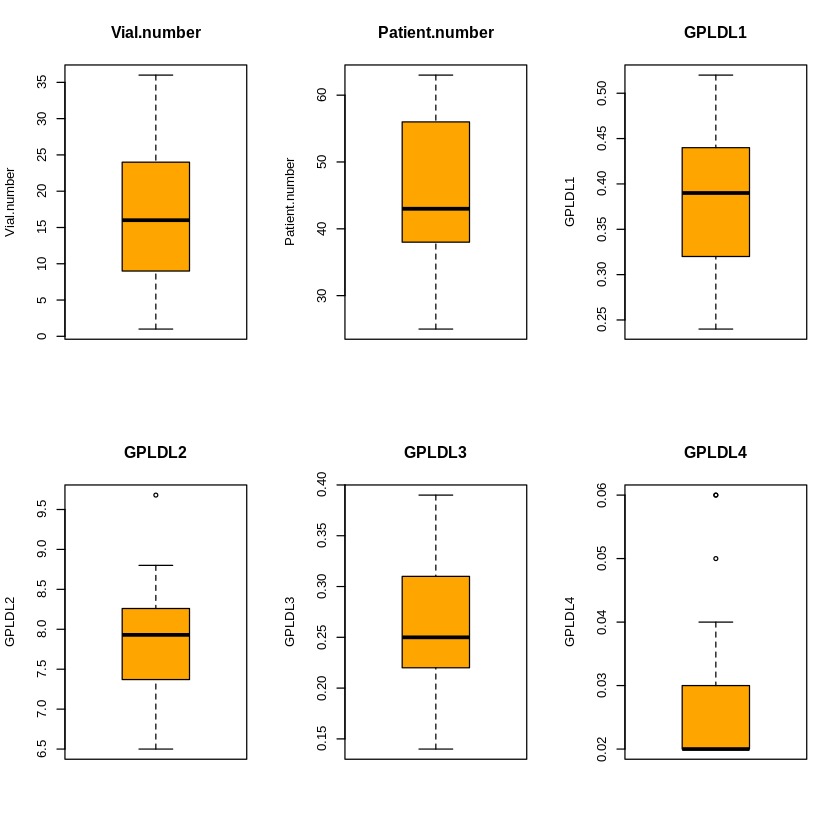

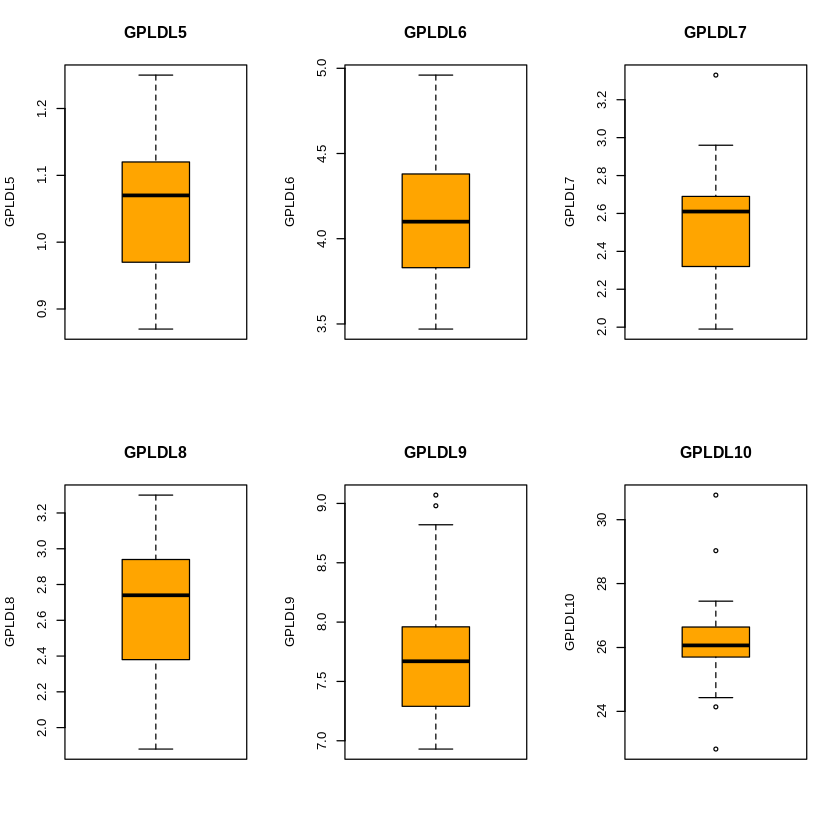

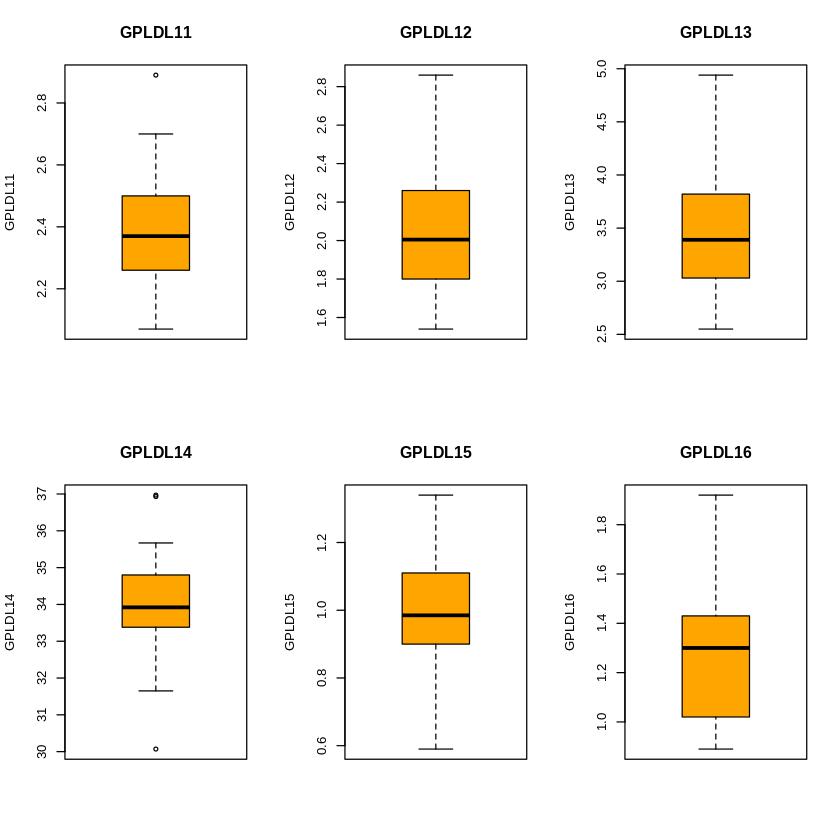

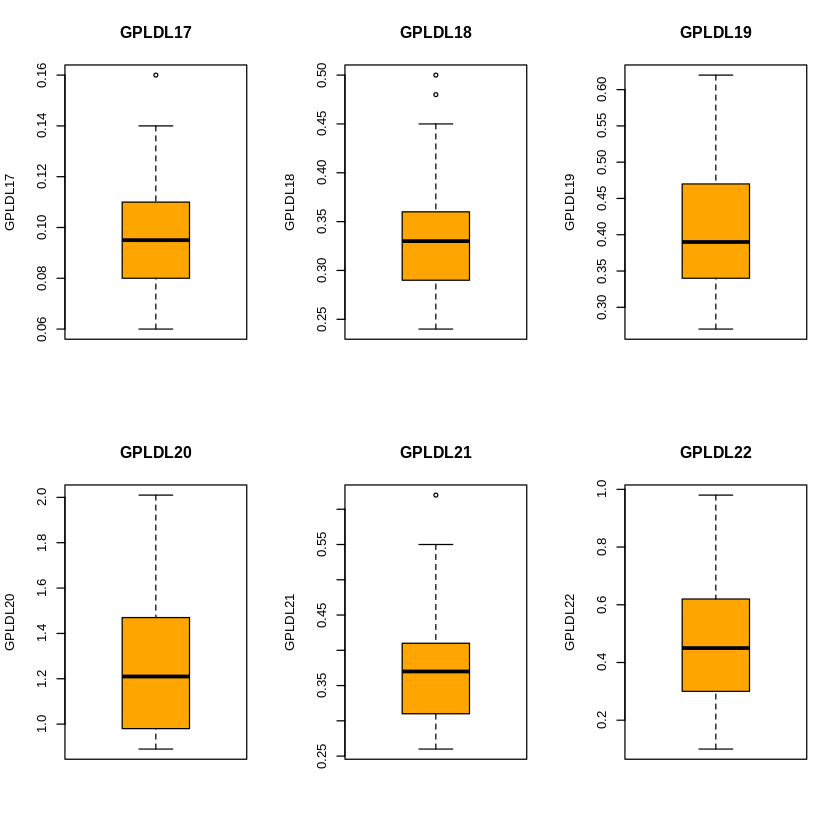

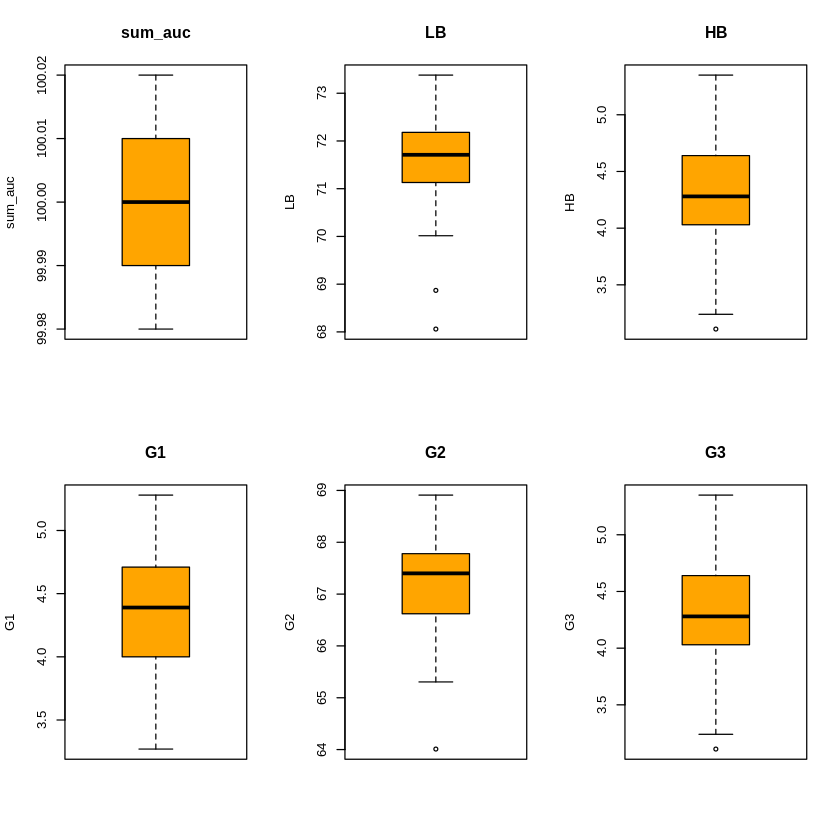

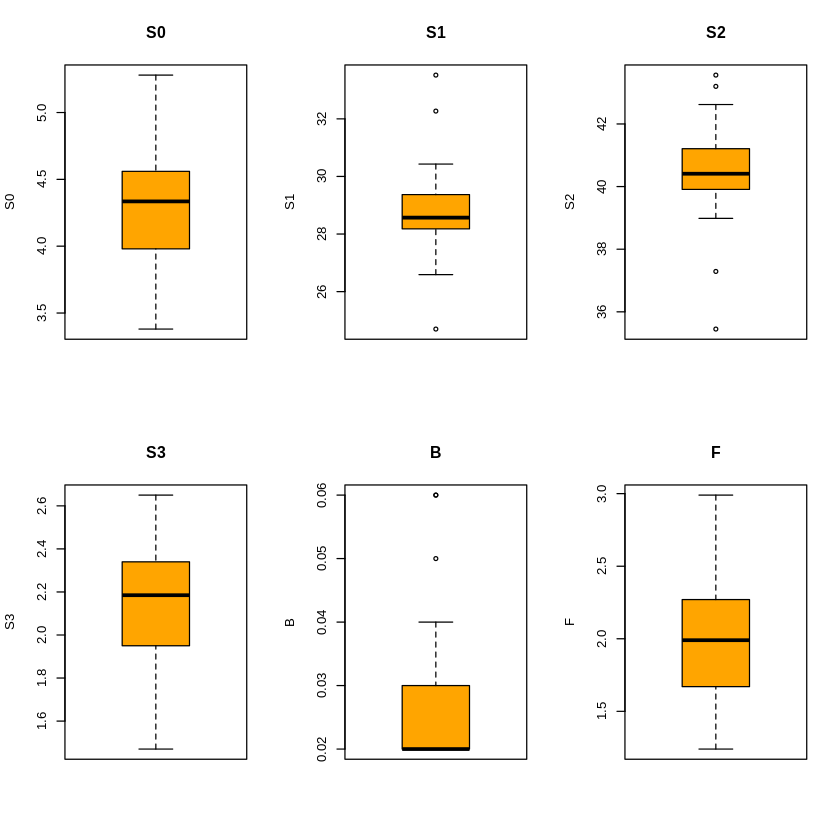

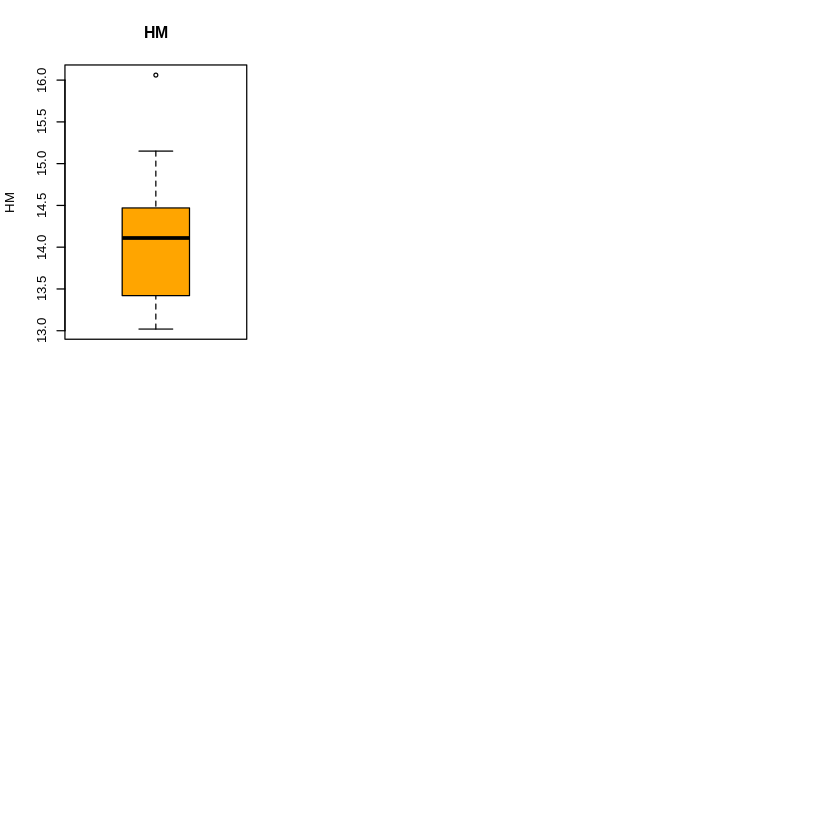

In [67]:
par(mfrow=c(2, 3))  # Adjust layout to fit multiple boxplots

for (i in 1:ncol(numeric_columns)) {
    boxplot(numeric_columns[, i], main=names(numeric_columns)[i], ylab=names(numeric_columns)[i], col='orange')
}

par(mfrow=c(1, 1))  # Reset layout

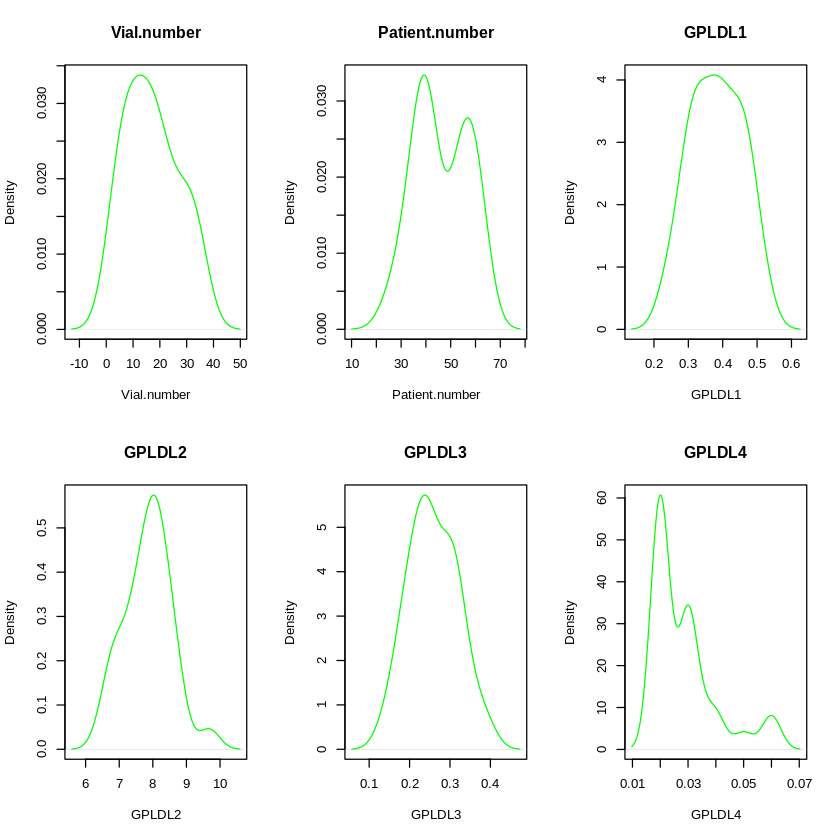

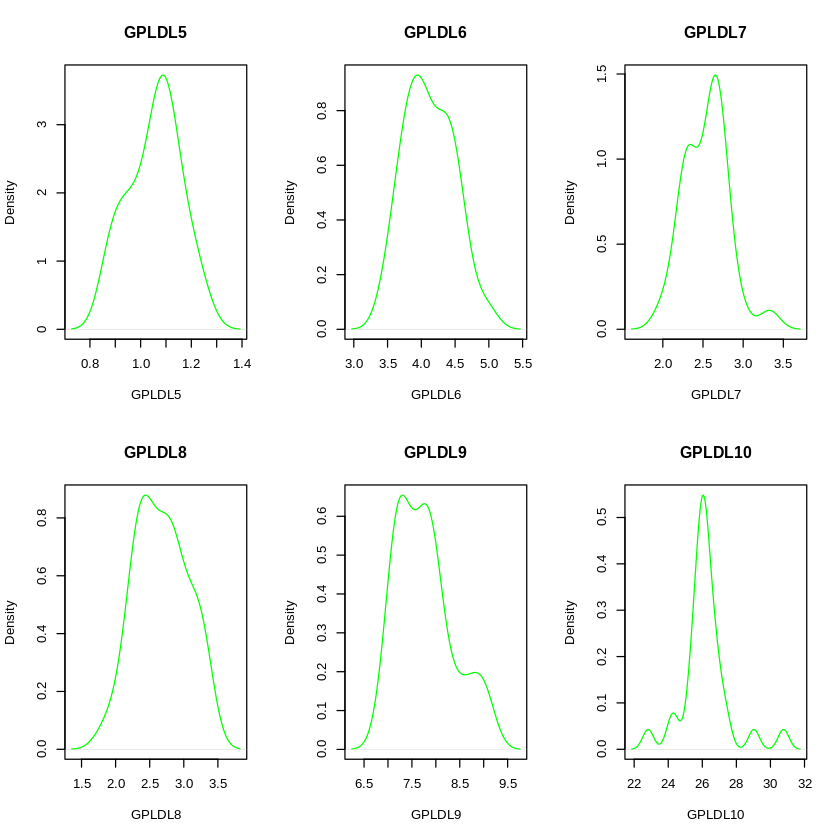

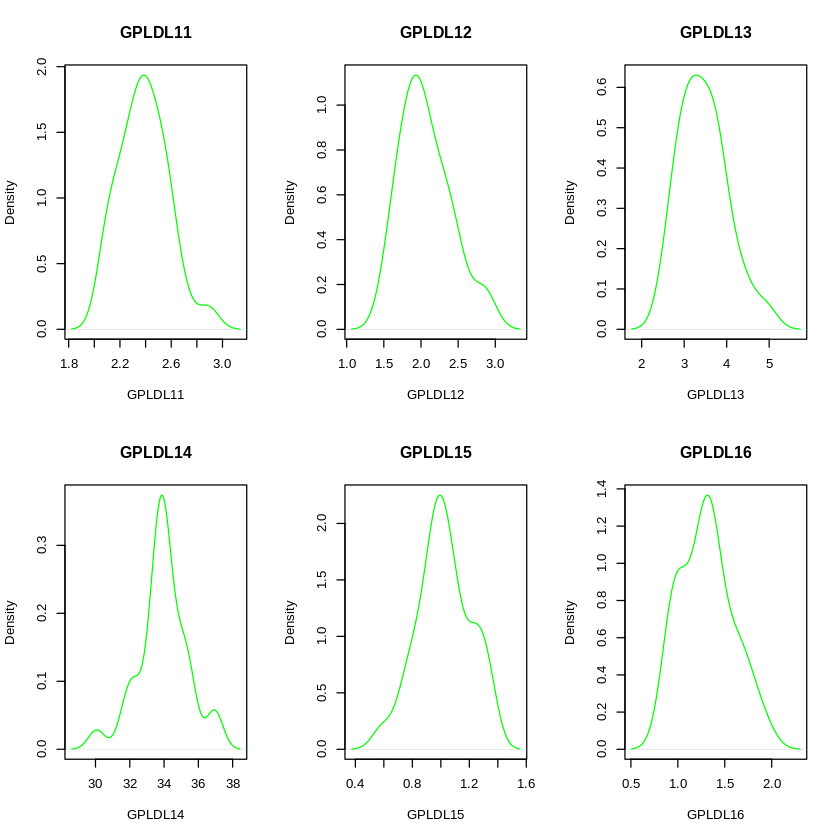

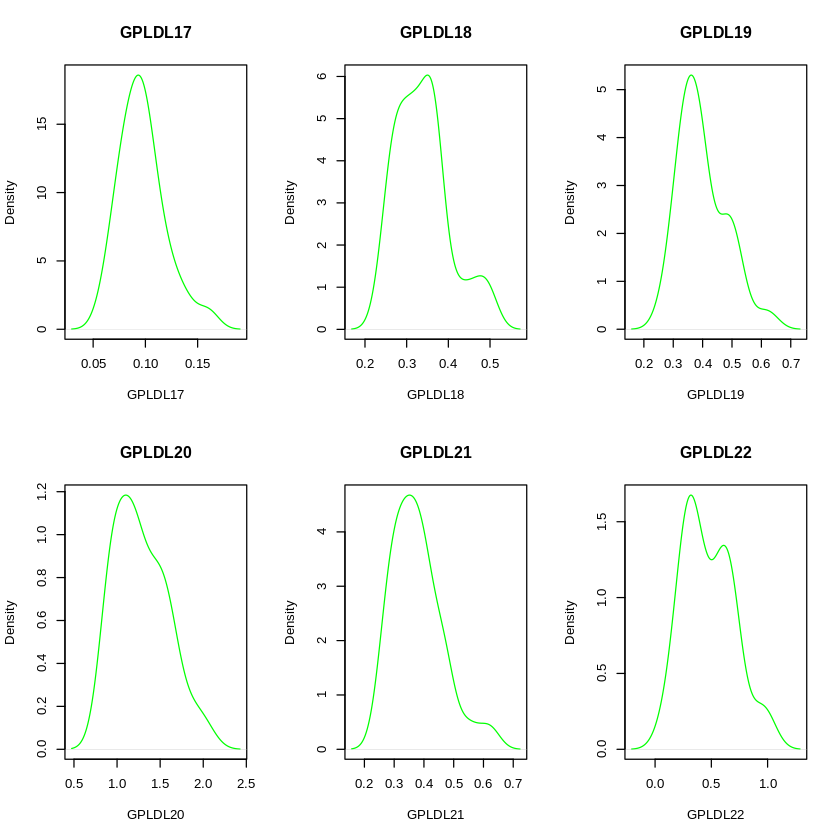

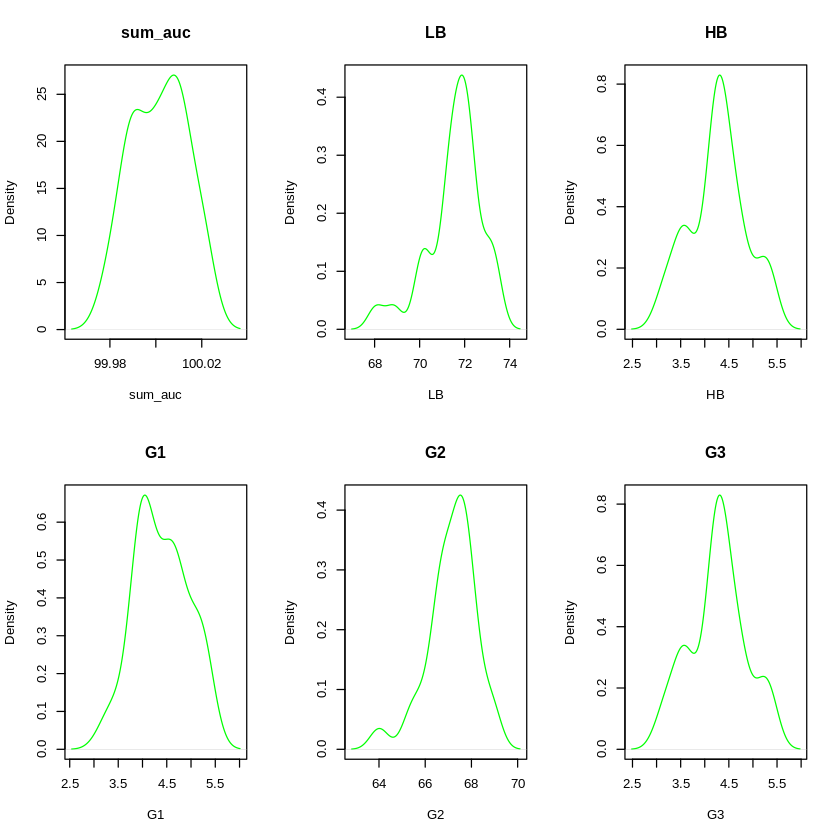

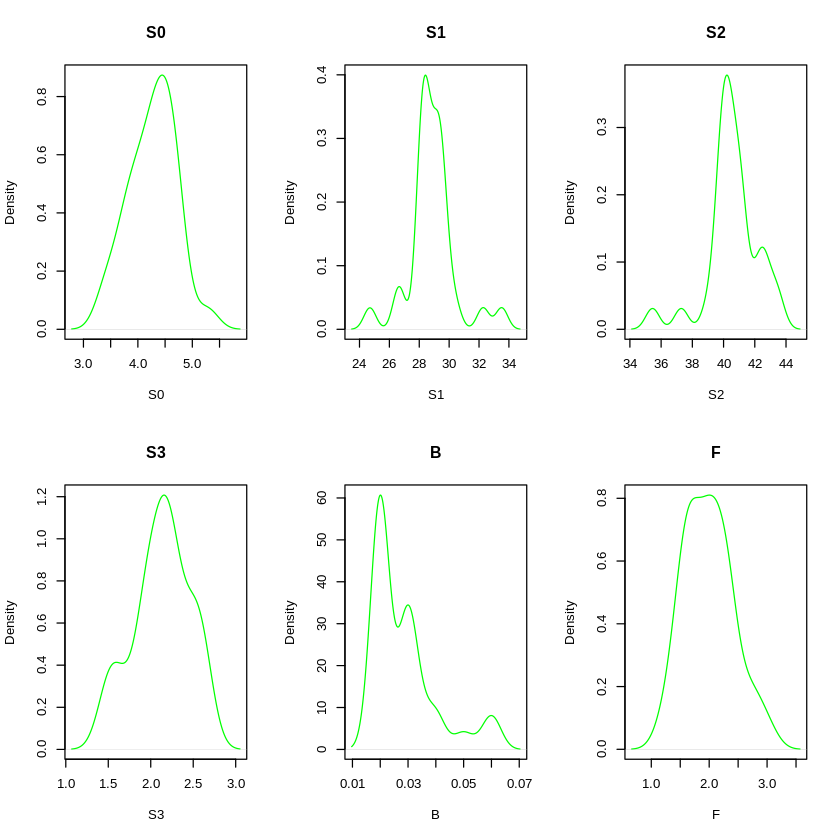

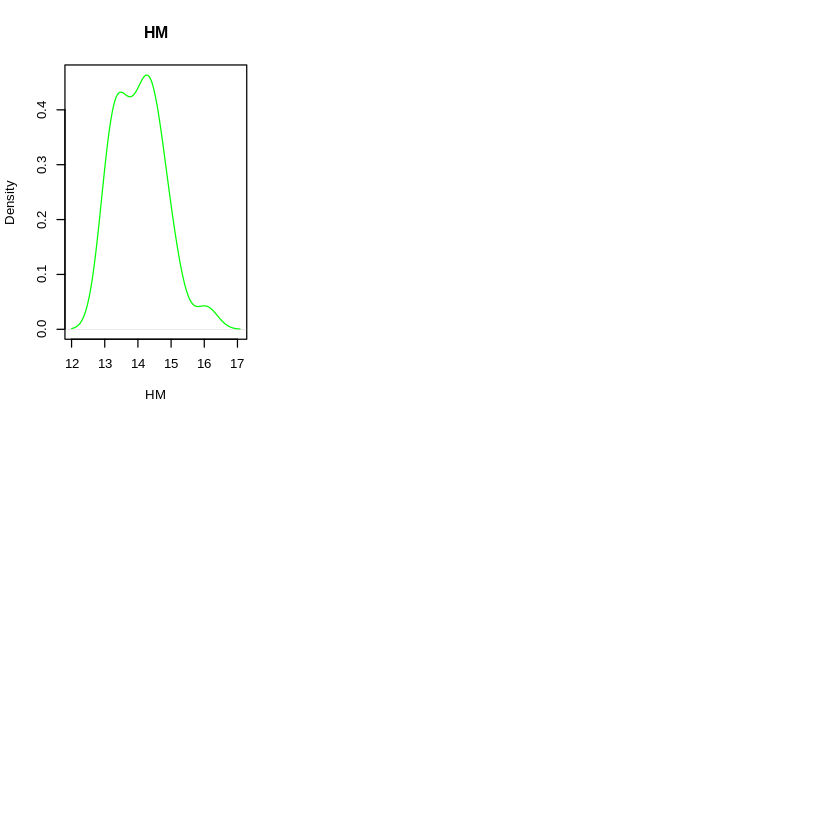

In [68]:
par(mfrow=c(2, 3))  # Adjust layout to fit multiple density plots

for (i in 1:ncol(numeric_columns)) {
    plot(density(numeric_columns[, i], na.rm = TRUE), main=names(numeric_columns)[i], xlab=names(numeric_columns)[i], col='green')
}

par(mfrow=c(1, 1))  # Reset layout